# Machine Learning model algorithms
A continuation from Machine learning starter notebook file

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt

# Naive Bayes Classifcation
Naive Bayes models are a group of extremely fast and simple classification algorithms
that are often suitable for very high-dimensional datasets. Because they are so fast
and have so few tunable parameters, they end up being very useful as a quick and dirty baseline for a classification problem. 

Bayes’ theorem is the premier method for understanding the probability of some
event, P(A | B), given some new information, P(B | A), and a prior belief in the probability of the event, P(A):

Reference: https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html

In [2]:
# Training a Classifer for Continuous Features
# Problem: You have only continuous features and you want to train a naive Bayes classifier.
# Solution: Use a Gaussian naive Bayes classifier in scikit-learn:

# Load libraries
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create Gaussian Naive Bayes object
classifer = GaussianNB()
# Train model
model = classifer.fit(features, target)

In [3]:
# Create new observation
new_observation = [[ 4, 4, 4, 0.4]]
# Predict class
model.predict(new_observation)

array([1])

In [4]:
# Create Gaussian Naive Bayes object with prior probabilities of each class
clf = GaussianNB(priors=[0.25, 0.25, 0.5])
# Train model
model = classifer.fit(features, target)

In [5]:
# Training a Classifer for Discrete and Count Features
# Problem: Given discrete or count data, you need to train a naive Bayes classifier.
# Solution: Use a multinomial naive Bayes classifier:

# Load libraries
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
# Create text
text_data = np.array(['I love Brazil. Brazil!',
'Brazil is best',
'Germany beats both'])
# Create bag of words
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)
# Create feature matrix
features = bag_of_words.toarray()
print(features)
print(count.get_feature_names_out())
# features
# Create target vector
target = np.array([0,0,1])
# Create multinomial naive Bayes object with prior probabilities of each class
classifer = MultinomialNB(class_prior=[0.25, 0.5])
# Train model
model = classifer.fit(features, target)

[[0 0 0 2 0 0 1]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 0]]
['beats' 'best' 'both' 'brazil' 'germany' 'is' 'love']


In [6]:
# Create new observation
new_observation = [[1, 0, 0, 1, 0, 1, 0]]
# Predict new observation's class
model.predict(new_observation)

array([1])

In [7]:
# Training a Naive Bayes Classifer for Binary Features
# Problem: You have binary feature data and need to train a naive Bayes classifier.
# Solution: Use a Bernoulli naive Bayes classifier:

# Load libraries
from sklearn.naive_bayes import BernoulliNB
# Create three binary features
features = np.random.randint(2, size=(100, 3))
# Create a binary target vector
target = np.random.randint(2, size=(100, 1)).ravel()
# Create Bernoulli Naive Bayes object with prior probabilities of each class
model = BernoulliNB(class_prior=[0.25, 0.5])
# Train model
classifier = model.fit(features, target)

In [8]:
# If we want to specify a uniform prior, we can set fit_prior=False:
model_uniform_prior = BernoulliNB(class_prior=None, fit_prior=True)

In [9]:
# Calibrating Predicted Probabilities
# Problem: You want to calibrate the predicted probabilities from naive Bayes classifiers so they
# are interpretable.
# Solution: Use CalibratedClassifierCV:

# Load libraries
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create Gaussian Naive Bayes object
classifer = GaussianNB()
# Create calibrated cross-validation with sigmoid calibration
classifer_sigmoid = CalibratedClassifierCV(classifer, cv=2, method='sigmoid')
# Calibrate probabilities
classifer_sigmoid.fit(features, target)
# Create new observation
new_observation = [[ 2.6, 2.6, 2.6, 0.4]]
# View calibrated probabilities
classifer_sigmoid.predict_proba(new_observation)

array([[0.31859969, 0.63663466, 0.04476565]])

In [10]:
# Train a Gaussian naive Bayes then predict class probabilities
classifer.fit(features, target).predict_proba(new_observation)

array([[2.31548432e-04, 9.99768128e-01, 3.23532277e-07]])

In [11]:
# if after we calibrate the predicted probabilities (which we did in our solution), we get very 
# different results:
# View calibrated probabilities
classifer_sigmoid.predict_proba(new_observation)

array([[0.31859969, 0.63663466, 0.04476565]])

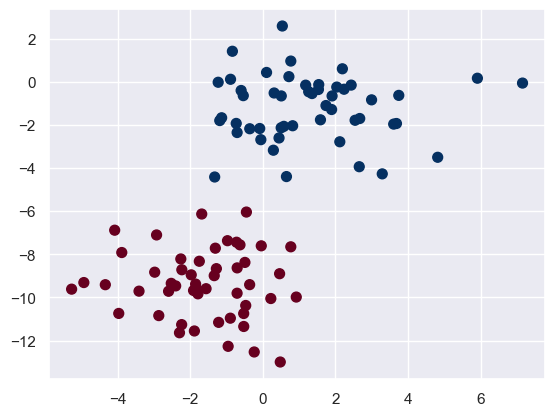

In [12]:
# Gaussian Naive Bayes
# Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this 
# classifier, the assumption is that data from each label is drawn from a simple Gaussian 
# distribution. For example using the data below:
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

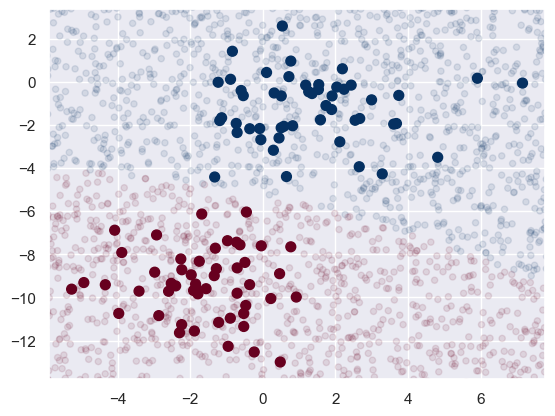

In [13]:
# we can quickly compute the posterior ratio and determine which
# label is the most probable for a given point.
# This procedure is implemented in Scikit-Learn’s sklearn.naive_bayes.GaussianNB
# estimator:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);
# Now let’s generate some new data and predict the label:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
# Now we can plot this new data to get an idea of where the decision boundary is
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [14]:
# A nice piece of this Bayesian formalism is that it naturally allows for probabilistic
# classification, which we can compute using the predict_proba method:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [15]:
# Multinomial Naive Bayes
# One place where multinomial naive Bayes is often used is in text classification, where
# the features are related to word counts or frequencies within the documents to be
# classified.
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
# For simplicity, we will select just a few of these categories, and download the training
# and testing set:
categories = ['talk.religion.misc', 'talk.politics.misc', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
# Here is a representative entry from the data:
# print(train)

In [17]:
# In order to use this data for machine learning, we need to be able to convert the content of 
# each string into a vector of numbers. For this we will use the TF–IDF vectorizer and create 
# a pipeline that attaches it to a multinomial naive Bayes classifier:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [18]:
# With this pipeline, we can apply the model to the training data, and predict labels for
# the test data:
model.fit(train.data, train.target)
labels = model.predict(test.data)

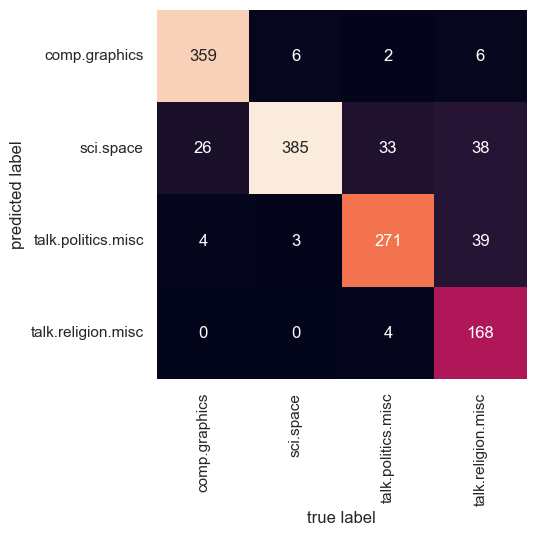

In [19]:
# Now that we have predicted the labels for the test data, we can evaluate them to learn
# about the performance of the estimator. For example, here is the confusion matrix
# between the true and predicted labels for the test data
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion! The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline.

In [20]:
# Here’s a quick utility function that will return the prediction for a single string:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [21]:
# Let’s try it out:
predict_category('Jupiter is the largest of the planets')

'sci.space'

In [22]:
predict_category('Obama was one of the US president')

'talk.politics.misc'

In [23]:
predict_category('An operating system is used to control computer hardwares')

'sci.space'

In [24]:
predict_category('I am the way the truth and life')

'talk.religion.misc'

# Linear Regression
Linear regression is one of the simplest supervised learning algorithms in our toolkit.
linear regression—and its extensions—continues to be a common and useful method of making
predictions when the target vector is a quantitative value (e.g., home price, age).


Linear regression models are
a good starting point for regression tasks. Such models are popular because they can
be fit very quickly, and are very interpretable.

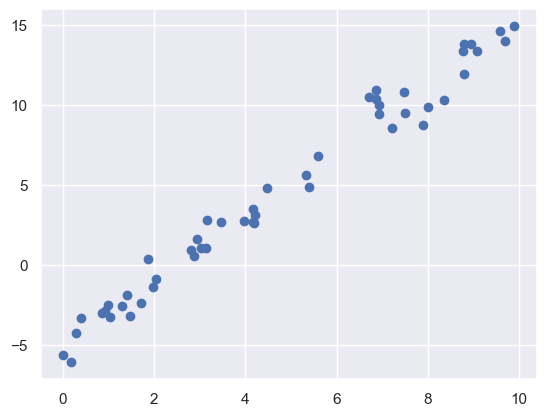

In [25]:
# Simple Linear Regression
# We will start with the most familiar linear regression, a straight line fit to data. 
# A straight line fit is a model of the form y = ax + b where a is commonly known as the slope,
# and b is commonly known as the intercept.
# For example Consider the following data, which is scattered about a line with a slope of 2 
# and an intercept of –5
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

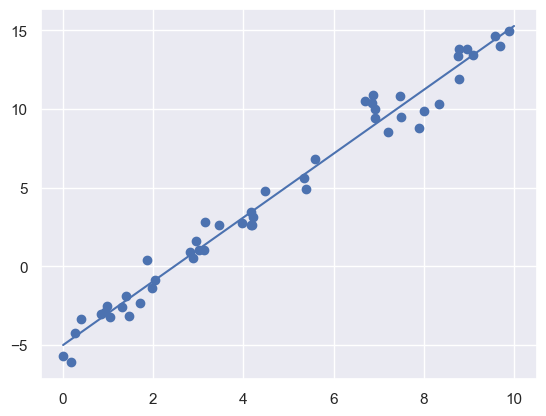

In [26]:
# We can use Scikit-Learn’s Linear Regression estimator to fit this data and construct
# the best-fit line 
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [27]:
# The slope and intercept of the data are contained in the model’s fit parameters, which
# in Scikit-Learn are always marked by a trailing underscore (ters are coef_ and intercept_).
print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:  2.027208810360695
Model intercept: -4.998577085553202


In [28]:
# Multidimensional Linear Regression
# simple straight-line fits, it can also handle multidimensional linear models of the form: 
# y = a0 + a1x1 + a2x2 + where there are multiple x values.
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


In [29]:
# Fitting a Line
# Problem: You want to train a model that represents a linear relationship between the feature
# and target vector.
# Solution: Use a linear regression (in scikit-learn, LinearRegression):

# Load libraries
from sklearn.linear_model import LinearRegression
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
# Load data with only two features
boston = fetch_california_housing()
features = boston.data[:,0:2]
target = boston.target
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features, target)

In [30]:
# After we have fit our model, we can view the value of each parameter. For example, β0, also
# called the bias or intercept, can be viewed using intercept_:
model.intercept_

-0.10189032759082606

In [31]:
# And β1 and β2 are shown using coef_:
# View the feature coefficients
model.coef_

array([0.43169191, 0.01744134])

In [32]:
# In our dataset, the target value is the median value of a Boston home (in the 1970s) in
# thousands of dollars. Therefore the price of the first home in the dataset is:
# First value in the target vector multiplied by 1000
target[0]*1000

4526.0

In [33]:
# Using the predict method, we can predict a value for that house:
# Predict the target value of the first observation, multiplied by 1000
model.predict(features)[0]*1000

4207.126263821177

In [34]:
# the first feature in our solution is the number of crimes per resident. Our model’s coefficient
# of this feature was ~–0.35, meaning that if we multiply this coefficient by 1,000 (since the 
# target vector is the house price in thousands of dollars), we have the change in house price for 
# each additional one crime per capita:
# First coefficient multiplied by 1000
model.coef_[0]*1000

431.6919075449535

In [35]:
# Handling Interactive Eﬀects
# Problem: You have a feature whose effect on the target variable depends on another feature.
# Solution: Create an interaction term to capture that dependence using scikit-learn’s Polynomial
# Features:

# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
# Load data with only two features
boston = fetch_california_housing()
features = boston.data[:,0:2]
target = boston.target
# Create interaction term
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_interaction, target)

In [36]:
# View the feature values for first observation
features[0]

array([ 8.3252, 41.    ])

In [37]:
# To create an interaction term, we simply multiply those two values together for every 
# observation:
# For each observation, multiply the values of the first and second feature
interaction_term = np.multiply(features[:, 0], features[:, 1])

In [38]:
# View interaction term for first observation
interaction_term[0]

341.33320000000003

In [39]:
# We can see the output of PolynomialFeatures from our solution by checking to see if the first
# observation’s feature values and interaction term value match our manually calculated version:
# View the values of the first observation
features_interaction[0]

array([  8.3252,  41.    , 341.3332])

# Basis Function Regression
One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions.The ideas to take our multidimensional linear model: y = a0 + a1x1 + a2x2 + a3x3 + and build the x1, x2, x3, and so on from our single-dimensional input x.

In [40]:
# using the PolynomialFeatures transformer:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [41]:
# This new, higher dimensional data representation can then be plugged into a linear regression.
# the cleanest way to accomplish this is to use a pipeline. Let’s make a 7th-degree polynomial 
# model in this way:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

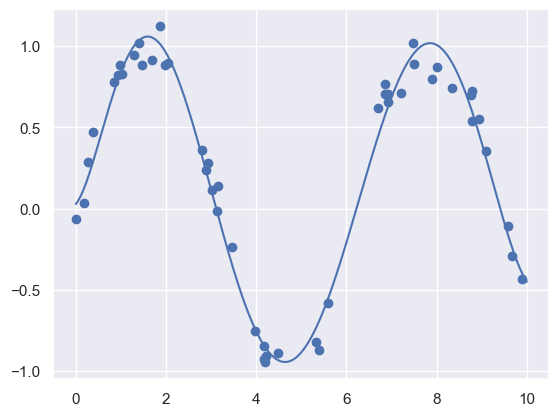

In [43]:
# With this transform in place, we can use the linear model to fit much more complicated 
# relationships between x and y.
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [44]:
# Fitting a Nonlinear Relationship
# Problem: You want to model a nonlinear relationship.
# Solution: Create a polynomial regression by including polynomial features in a linear regression model:

# Load library
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
# Load data with one feature
boston = fetch_california_housing()
features = boston.data[:,0:1]
target = boston.target
# Create polynomial features x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_polynomial, target)

In [45]:
# View first observation
features[0]

array([8.3252])

In [46]:
# To create a polynomial feature, we would raise the first observation’s value to the second
# degree, x^2:
# View first observation raised to the second power, x^2
features[0]**2

array([69.30895504])

In [47]:
# This would be our new feature. We would then also raise the first observation’s value to the 
# third degree, x^3:
# View first observation raised to the third power, x^3
features[0]**3

array([577.0109125])

In [48]:
# By including all three features (x, x2, and x3) in our feature matrix and then running a
# linear regression, we have conducted a polynomial regression:
# View the first observation's values for x, x^2, and x^3
features_polynomial[0]

array([  8.3252    ,  69.30895504, 577.0109125 ])

# Regularization
if we choose too many Gaussian basis functions, we end up with results that don’t
look so good. This is typical overfitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out. We know that
such behavior is problematic, and it would be nice if we could limit such spikes
explicitly in the model by penalizing large values of the model parameters. Such a
penalty is known as regularization, and comes in several forms.


In [49]:
# Reducing Variance with Regularization
# Problem: You want to reduce the variance of your linear regression model.
# Solution: Use a learning algorithm that includes a shrinkage penalty (also called regularization)
# like ridge regression and lasso regression:

# Load libraries
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
# Load data
boston = fetch_california_housing()
features = boston.data
target = boston.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create ridge regression with an alpha value
regression = Ridge(alpha=0.5)
# Fit the linear regression
model = regression.fit(features_standardized, target)

In [50]:
# scikit-learn includes a RidgeCV method that allows us to select the ideal value for α:
# Load library
from sklearn.linear_model import RidgeCV
# Create ridge regression with three alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
# Fit the linear regression
model_cv = regr_cv.fit(features_standardized, target)
# View coefficients
model_cv.coef_

array([ 0.8293461 ,  0.11939823, -0.26422311,  0.30398067, -0.00427544,
       -0.03936068, -0.8937389 , -0.86433656])

In [51]:
# We can then easily view th
# View alpha
model_cv.alpha_

10.0

In [52]:
# Module to perform examples not supported on my system but still working on it.
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

# Practical example Predicting Bicycle Traffic

In [57]:
# As an example, let’s take a look at whether we can predict the number of bicycle trips
# across Seattle’s Fremont Bridge based on weather, season, and other factors.

# counts = pd.read_csv('C:\\PythonClass\\Data Science\\Datasets\\fremont_hourly.csv', index_col='Date', parse_dates=True)
# weather = pd.read_csv('C:\\PythonClass\\Data Science\\Datasets\\BicycleWeather.csv', index_col='DATE', parse_dates=True)


counts = pd.read_csv('C:\\Datasets\\fremont_hourly.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('C:\\Datasets\\BicycleWeather.csv', index_col='DATE', parse_dates=True)


In [58]:
counts.head()

Fremont Bridge NB  Fremont Bridge SB
Date                                                     
2012-10-02 00:00:00                0.0                0.0
2012-10-02 01:00:00                0.0                0.0
2012-10-02 02:00:00                0.0                0.0
2012-10-02 03:00:00                0.0                0.0
2012-10-02 04:00:00                0.0                0.0

In [59]:
weather.head()

STATION                                STATION_NAME  \
DATE                                                                        
2012-01-01  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-01-02  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-01-03  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-01-04  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   
2012-01-05  GHCND:USW00024233  SEATTLE TACOMA INTERNATIONAL AIRPORT WA US   

            PRCP  SNWD  SNOW  TMAX  TMIN  AWND  WDF2  WDF5  ...  WT17  WT05  \
DATE                                                        ...               
2012-01-01     0     0     0   128    50    47   100    90  ... -9999 -9999   
2012-01-02   109     0     0   106    28    45   180   200  ... -9999 -9999   
2012-01-03     8     0     0   117    72    23   180   170  ... -9999 -9999   
2012-01-04   203     0     0   122    56    47   180   190  ... -9999 -9999   
2012-01-05    13     0     0    89    28    61   200   220  ... -9999 -9999   

            WT02  WT22  WT04  WT13  WT16  WT08  WT18  WT03  
DATE                                                        
2012-01-01 -9999 -9999 -9999 -9999 -9999 -9999 -9999 -9999  
2012-01-02 -9999 -9999 -9999     1     1 -9999 -9999 -9999  
2012-01-03 -9999 -9999 -9999 -9999     1 -9999 -9999 -9999  
2012-01-04 -9999 -9999 -9999     1     1 -9999 -9999 -9999  
2012-01-05 -9999 -9999 -9999 -9999     1 -9999 -9999 -9999  

[5 rows x 25 columns]

In [61]:
# Next we will compute the total daily bicycle traffic, and put this in its own DataFrame:
daily = counts.resample('d').sum()   #resample is just like doing groupby
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily

Total
Date              
2012-10-02  1938.0
2012-10-03  3521.0
2012-10-04  3475.0
2012-10-05  3148.0
2012-10-06  2006.0
...            ...
2014-05-27  5032.0
2014-05-28  4008.0
2014-05-29  4587.0
2014-05-30  4869.0
2014-05-31  2887.0

[607 rows x 1 columns]

In [62]:
# the patterns of use generally vary from day to day; let’s account for this in our data by 
# adding binary columns that indicate the day of the week:
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
daily

Total  Sun  Mon  Tue  Wed  Thu  Fri  Sat
Date                                                 
2012-10-02  1938.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2012-10-03  3521.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2012-10-04  3475.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2012-10-05  3148.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2012-10-06  2006.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
...            ...  ...  ...  ...  ...  ...  ...  ...
2014-05-27  5032.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2014-05-28  4008.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2014-05-29  4587.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2014-05-30  4869.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2014-05-31  2887.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

[607 rows x 8 columns]

In [63]:
# Similarly, we might expect riders to behave differently on holidays; let’s add an indicator 
# of this as well:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)
daily

Total  Sun  Mon  Tue  Wed  Thu  Fri  Sat  holiday
Date                                                          
2012-10-02  1938.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0
2012-10-03  3521.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0
2012-10-04  3475.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0
2012-10-05  3148.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0
2012-10-06  2006.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0
...            ...  ...  ...  ...  ...  ...  ...  ...      ...
2014-05-27  5032.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0
2014-05-28  4008.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0
2014-05-29  4587.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0
2014-05-30  4869.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0
2014-05-31  2887.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0

[607 rows x 9 columns]

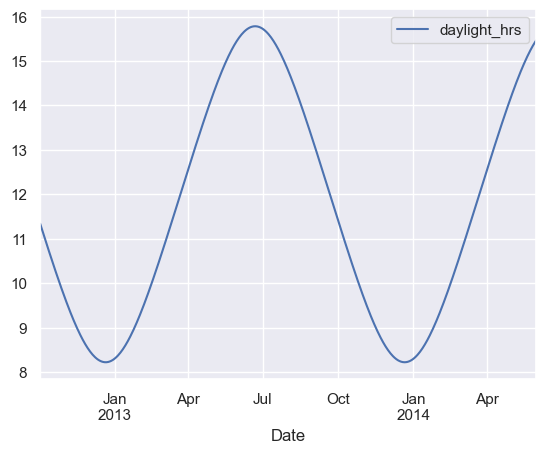

In [64]:
from datetime import datetime
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) 
                                                    * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();

In [65]:
# We can also add the average temperature and total precipitation to the data. In addition to 
# the inches of precipitation, let’s add a flag that indicates whether a day is dry
# (has zero precipitation):
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [66]:
# Finally, let’s add a counter that increases from day 1, and measures how many years have passed. 
# This will let us measure any observed annual increase or decrease in daily crossings:
daily['annual'] = (daily.index - daily.index[0]).days / 365.
# Now our data is in order, and we can take a look at it:
daily.head()

Total  Sun  Mon  Tue  Wed  Thu  Fri  Sat  holiday  daylight_hrs  \
Date                                                                           
2012-10-02  1938.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0     11.335681   
2012-10-03  3521.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   
2012-10-04  3475.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   
2012-10-05  3148.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   
2012-10-06  2006.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     11.103056   

            PRCP  Temp (C)  dry day    annual  
Date                                           
2012-10-02   0.0     13.90        1  0.000000  
2012-10-03   0.0     13.35        1  0.002740  
2012-10-04   0.0     13.60        1  0.005479  
2012-10-05   0.0     15.30        1  0.008219  
2012-10-06   0.0     15.85        1  0.010959

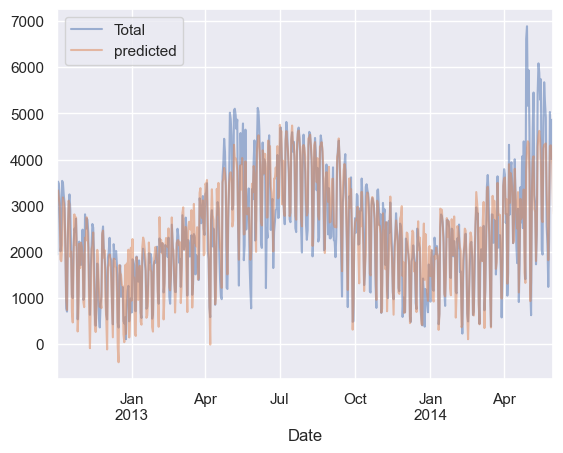

In [67]:
# With this in place, we can choose the columns to use, and fit a linear regression model to 
# our data. 
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 
                'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)
# Finally, we can compare the total and predicted bicycle traffic visually 
daily[['Total', 'predicted']].plot(alpha=0.5);

In [68]:
# we can take a look at the coefficients of the linear model to estimate how much
# each feature contributes to the daily bicycle count:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              306.551668
Tue              359.247220
Wed              199.486334
Thu              -93.133822
Fri            -1276.752727
Sat            -1308.178141
Sun              265.779104
holiday        -1190.062935
daylight_hrs     137.183312
PRCP            -662.551672
dry day          558.729470
Temp (C)          64.596364
annual           210.767214
dtype: float64

In [69]:
# These numbers are difficult to interpret without some measure of their uncertainty. We can 
# compute these uncertainties quickly using boots return a + b trap resamplings of the data:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)
# With these errors estimated, let’s again look at the results:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            307.0  128.0
Tue            359.0  124.0
Wed            199.0  127.0
Thu            -93.0  115.0
Fri          -1277.0  128.0
Sat          -1308.0  129.0
Sun            266.0  128.0
holiday      -1190.0  196.0
daylight_hrs   137.0   14.0
PRCP          -663.0   70.0
dry day        559.0   44.0
Temp (C)        65.0    5.0
annual         211.0   47.0


In [70]:
# Reducing Features with Lasso Regression
# Problem: You want to simplify your linear regression model by reducing the number of features.
# Solution: Use a lasso regression:

# Load library
from sklearn.linear_model import Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
# Load data
boston = fetch_california_housing()
features = boston.data
target = boston.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create lasso regression with alpha value
regression = Lasso(alpha=0.5)
# Fit the linear regression
model = regression.fit(features_standardized, target)

In [71]:
# For example, in our solution we set alpha to 0.5 and we can see that many of the coefficients 
# are 0, meaning their corresponding features are not used in the model:
# View coefficients
model.coef_

array([ 0.29398939,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

In [72]:
# However, if we increase alpha(α) to a much higher value, we see that literally none of the
# features are being used:
# Create lasso regression with a high alpha
regression_a10 = Lasso(alpha=10)
model_a10 = regression_a10.fit(features_standardized, target)
model_a10.coef_

array([ 0.,  0.,  0., -0., -0., -0., -0., -0.])

# Logistic Regression
Logistic regression and its extensions, like multinomial logistic regression, allow us to predict the probability that an observation is of a certain class using a straightforward and well understood approach.

In [74]:
# Training a Binary Classifer (Dinary classifier is having two classes to predict[male and female])
# Problem: You need to train a simple classifier model.
# Solution: Train a logistic regression in scikit-learn using LogisticRegression:

# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0)
# Train model
model = logistic_regression.fit(features_standardized, target)

In [75]:
# Create new observation
new_observation = [[.5, .5, .5, .5]]
# Predict class
model.predict(new_observation)

array([1])

In [76]:
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.17738424, 0.82261576]])

In [80]:
# Training a Multiclass Classifer ( when is more than two)
# Problem: Given more than two classes, you need to train a classifier model.
# Solution: Train a logistic regression in scikit-learn with LogisticRegression using one-vs-rest
# or multinomial methods:

# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create one-vs-rest logistic regression object
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
# Train model
model = logistic_regression.fit(features_standardized, target)

In [81]:
LogisticRegression??

In [82]:
# Reducing Variance Through Regularization
# Problem: You need to reduce the variance of your logistic regression model.
# Solution: Tune the regularization strength hyperparameter, C:

# C is use to rep regularization

# Load libraries
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create decision tree classifier object
logistic_regression = LogisticRegressionCV(penalty='l2', Cs=10, random_state=0, n_jobs=-1)
# Train model
model = logistic_regression.fit(features_standardized, target)

In [7]:
# Training a Classifer on Very Large Data
# Problem: You need to train a simple classifier model on a very large set of data.
# Solution: Train a logistic regression in scikit-learn with LogisticRegression using the stochas‐
# tic average gradient (SAG) solver:

    # Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0, solver="sag")
# Train model
model = logistic_regression.fit(features_standardized, target)

In [83]:
# Handling Imbalanced Classes
# Problem: You need to train a simple classifier model.
# Solution: Train a logistic regression in scikit-learn using LogisticRegression:

# Load libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create decision tree classifier object
logistic_regression = LogisticRegression(random_state=0, class_weight="balanced")
# Train model
model = logistic_regression.fit(features_standardized, target)

In [84]:
LogisticRegression??

# Support Vector Machines
Support vector machines (SVMs) are a particularly powerful and flexible class of
supervised algorithms for both classification and regression. In this section, we will
develop the intuition behind support vector machines and their use in classification
problems.

Support vector machines classify data by finding the hyperplane that maximizes the
margin between the classes in the training data. In a two-dimensional example with
two classes, we can think of a hyperplane as the widest straight “band” (i.e., line with
margins) that separates the two classes.

In [85]:
# Training a Linear Classifer
# Problem: You need to train a model to classify observations.
# Solution: Use a support vector classifier (SVC) to find the hyperplane that maximizes the mar‐
# gins between the classes:
    
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load data with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier
svc = LinearSVC(C=1.0, dual=True)
# Train model
model = svc.fit(features_standardized, target)

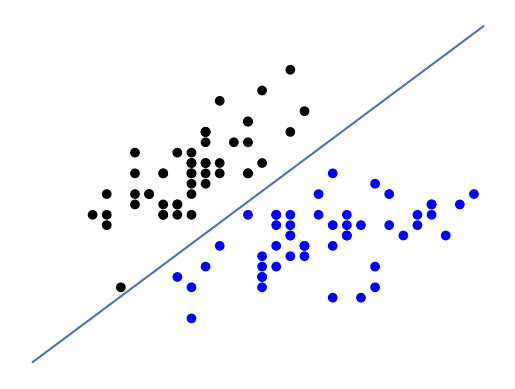

In [86]:
# In the following code we plot the two classes on a two-dimensional space, then draw the hyperplane:
# Load library
from matplotlib import pyplot as plt
# Plot data points and color using their class
color = ["black" if c == 0 else "blue" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off")
plt.show();

In [87]:
# Create new observation
new_observation = [[ -2, 3]]
# Predict class of new observat
svc.predict(new_observation)

array([0])

In [89]:
# Handling Linearly Inseparable Classes Using Kernels
# Problem: You need to train a support vector classifier, but your classes are linearly inseparable. (i.e you can't use linear svc )
# Solution: Train an extension of a support vector machine using kernel functions to create non‐
# linear decision boundaries:

# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Set randomization seed
np.random.seed(0)
# Generate two features
features = np.random.randn(200, 2)
# Use a XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)  #radial basic function
# Train the classifier
model = svc.fit(features, target)

In [90]:
# Plot observations and decision boundary hyperplane
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(colors=["Red", "Blue"])
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), marker="+", label=cl)

In [91]:
# Create support vector classifier with a linear kernel
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Train model
svc_linear.fit(features, target)

SVC(C=1, kernel='linear', random_state=0)

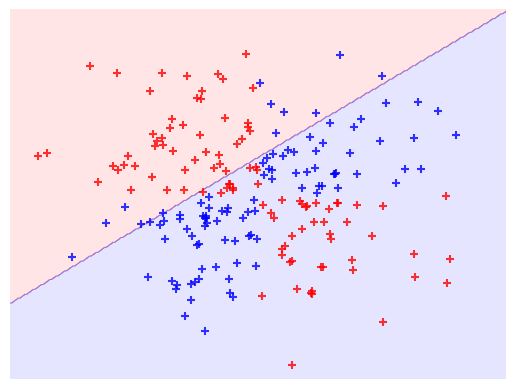

In [92]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show();

In [93]:
# As we can see, our linear hyperplane did very poorly at dividing the two classes! Now, let’s 
# swap out the linear kernel with a radial basis function kernel and use it to train a new model:

# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Train the classifier
model = svc.fit(features, target)

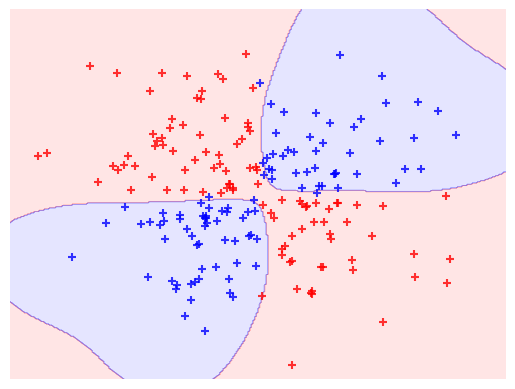

In [94]:
# And then visualize the observations and hyperplane:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

In [95]:
# Creating Predicted Probabilities
# Problem: You need to know the predicted class probabilities for an observation.
# Solution: When using scikit-learn’s SVC, set probability=True, train the model, 
# then use predict_proba to see the calibrated probabilities:
    
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)
# Create new observation
new_observation = [[.4, .4, .4, .4]]
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

In [96]:
# Identifying Support Vectors
# Problem: You need to identify which observations are the support vectors of the decision hyperplane.
# Solution: Train the model, then use support_vectors_:

# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier object
svc = SVC(kernel="linear", random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)
# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [97]:
# we can view the indices of the support vectors using support_:
model.support_

array([23, 41, 57, 98])

In [98]:
# we can use n_support_ to find the number of support vectors belonging to each class:
model.n_support_

array([2, 2])

In [99]:
# Handling Imbalanced Classes
# Problem: You need to train a support vector machine classifier in the presence of imbalanced
# classes.
# Solution: Increase the penalty for misclassifying the smaller class using class_weight:

# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)

In [100]:
from scipy import stats
# use Seaborn plotting defaults
import seaborn as sns; sns.set()

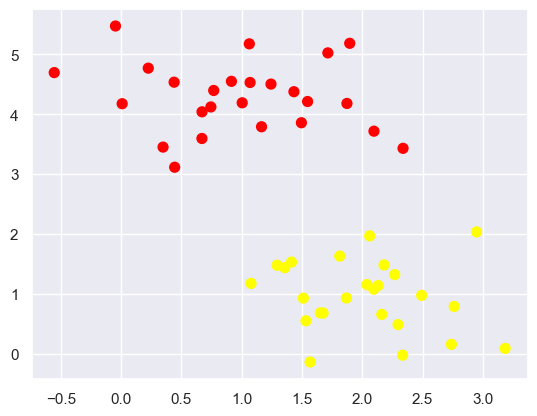

In [101]:
# Motivating Support Vector Machines (here we will consider discriminative classifcation)
# As an example of this, consider the simple case of a classification task, in which the
# two classes of points are well separated 
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

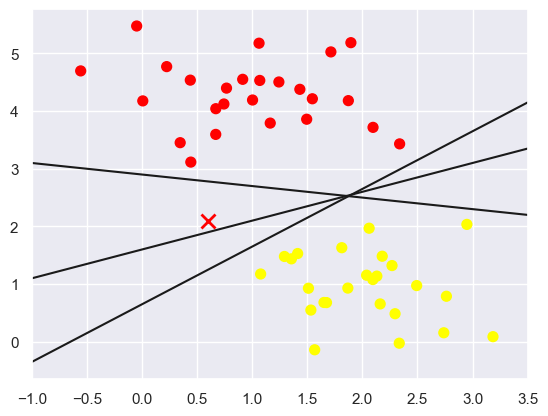

In [102]:
# We can draw them as follows:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

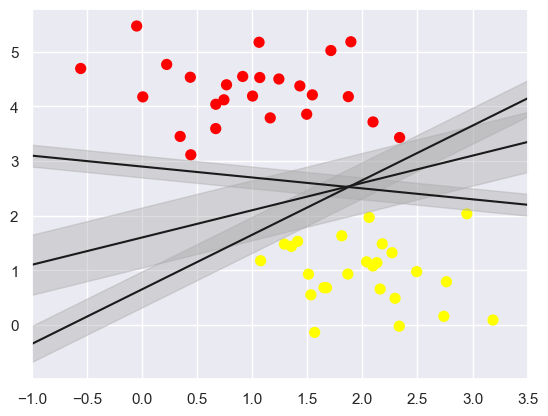

In [103]:
# Support Vector Machines: Maximizing the Margin
# rather than simply drawing a zero-width line between the classes, we can draw around each line 
# a margin of some width, up to the nearest point. Here is an example of how this might look
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

In [104]:
# Fitting a support vector machine
# Let’s see the result of an actual fit to this data: we will use Scikit-Learn’s support vector
# classifier to train an SVM model on this data. 
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

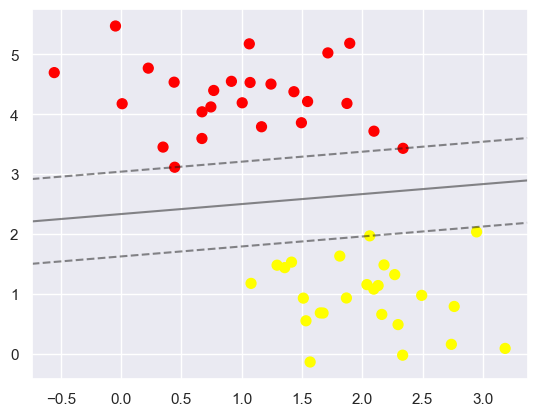

In [105]:
# To better visualize what’s happening here, let’s create a quick convenience function
# that will plot SVM decision boundaries for us:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, \
                   linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [106]:
#  the identity of these points is stored in the support_vectors_ attribute of the classifier:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

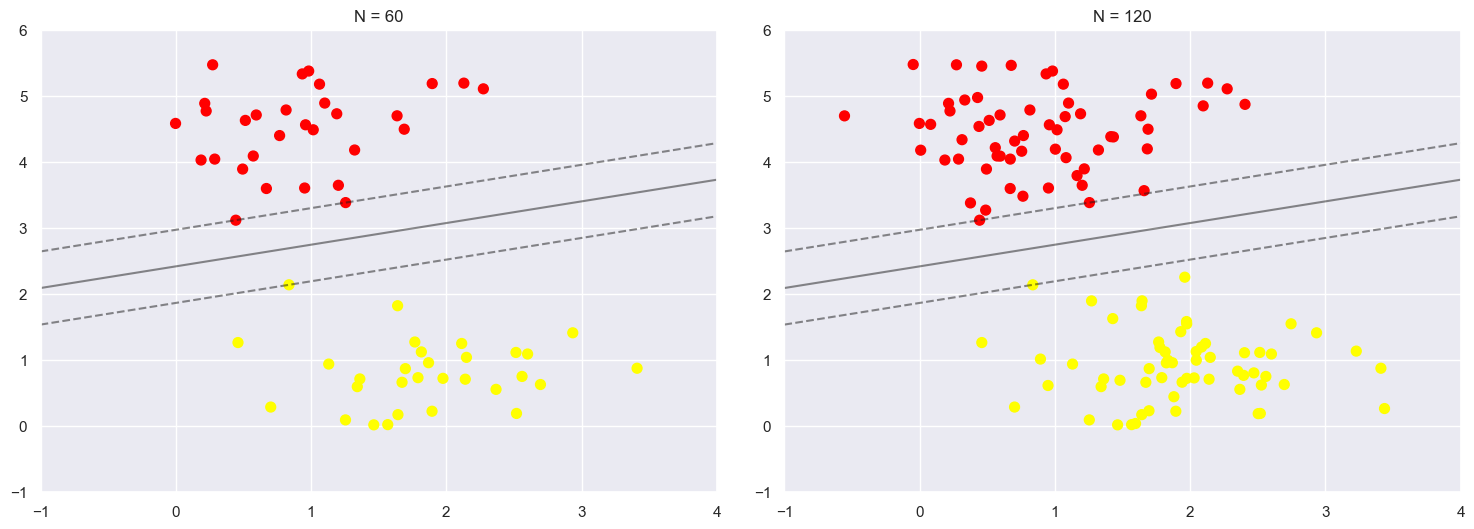

In [107]:
# We can see this, for example, if we plot the model learned from the first 60 points and
# first 120 points of this dataset:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [108]:
# you can use IPython’s interactive widgets to view this feature of the SVM model interactively:
from ipywidgets import interact, fixed 
interact(plot_svm, N=[10, 20, 60, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 20, 60, 200), value=10), Output()), _dom_classes=…

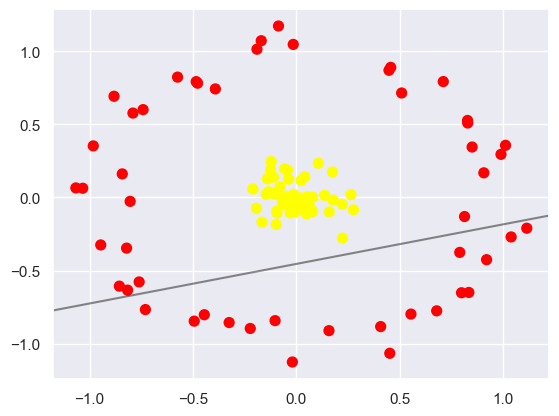

In [109]:
# Beyond linear boundaries: Kernel SVM
# Where SVM becomes extremely powerful is when it is combined with kernels. To motivate the 
# need for kernels, let’s look at some data that is not linearly separable 
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [110]:
# we might project the data into a higher dimension such that a linear separator would be sufficient
r = np.exp(-(X ** 2).sum(1))
# We can visualize this extra data dimension using a three-dimensional plot
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [111]:
# In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to
# an RBF (radial basis function) kernel, using the kernel model hyperparameter
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

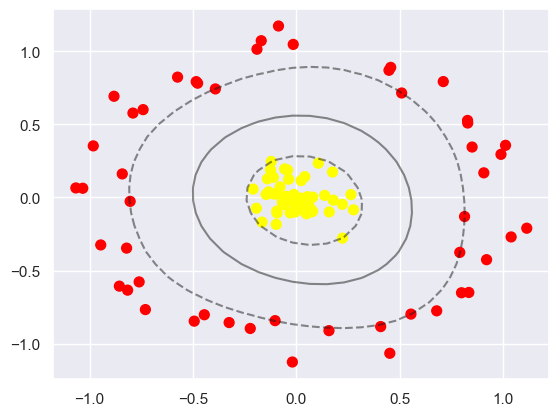

In [112]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

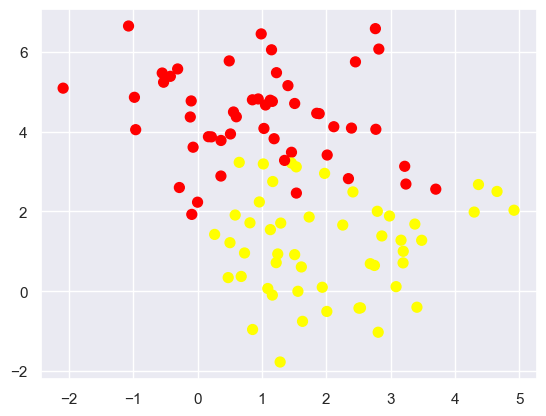

In [113]:
# Tuning the SVM: Softening margins
# Our discussion so far has centered on very clean datasets, in which a perfect decision
# boundary exists. But what if your data has some amount of overlap?
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

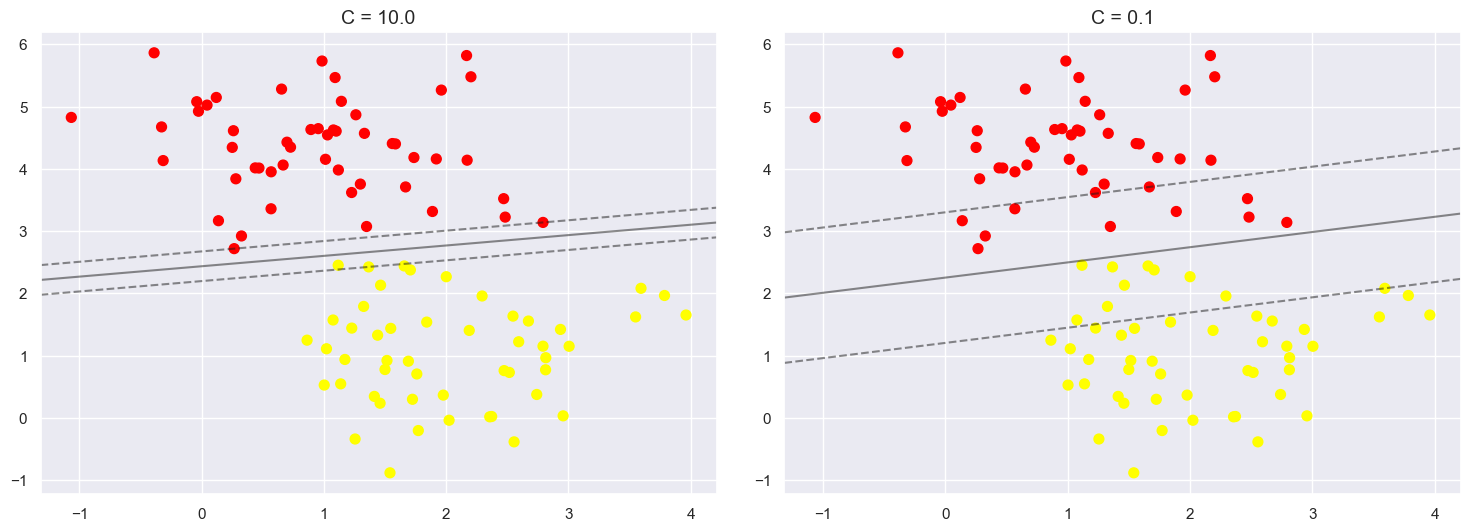

In [114]:
# The plot below gives a visual picture of how a changing Cparameter
# affects the final fit, via the softening of the margin:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=300, lw=1,\
                facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Practical Example: Face Recognition

In [7]:
# We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated 
# photos of various public figures
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

# import os
# image = []
# target_name = []
# for root, dirs, files in os.walk("C:\\PythonClass\\Data Science\\Datasets\\lfw_funneled"):
#     for folder in dirs:
#         for rot, fold, file in os.walk(root+'\\'+folder):
#             for img in file:
#                 target_name.append(os.path.basename(folder))
#                 image.append(root+'\\'+folder+'\\'+img)
# print(len(target_name))
# target_name

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [8]:
print(len(faces.images))
faces.images

1348


array([[[0.53333336, 0.52418303, 0.49673203, ..., 0.2653595 ,
         0.2653595 , 0.26013073],
        [0.56993467, 0.545098  , 0.4797386 , ..., 0.2627451 ,
         0.2627451 , 0.26013073],
        [0.5882353 , 0.5398693 , 0.475817  , ..., 0.2640523 ,
         0.26013073, 0.25751635],
        ...,
        [0.59738564, 0.7176471 , 0.40261438, ..., 0.00653595,
         0.00261438, 0.00392157],
        [0.44575164, 0.793464  , 0.67058825, ..., 0.00522876,
         0.00653595, 0.00522876],
        [0.29673204, 0.69803923, 0.84313726, ..., 0.00653595,
         0.00653595, 0.00130719]],

       [[0.28627452, 0.20784314, 0.2535948 , ..., 0.28496733,
         0.3620915 , 0.30457518],
        [0.24836601, 0.22745098, 0.33594772, ..., 0.27189544,
         0.34901962, 0.30588236],
        [0.29281047, 0.3006536 , 0.37908497, ..., 0.25751635,
         0.33594772, 0.32941177],
        ...,
        [0.10718954, 0.10326798, 0.08104575, ..., 0.95032674,
         0.9267974 , 0.90718955],
        [0.0

In [9]:
# You will need to install the cv2 library using "pip install opencv-python" command.
# import cv2
# image_data = []
# for data in faces.images:
#     image_data.append(cv2.imread(data, cv2.IMREAD_GRAYSCALE))
# image_data

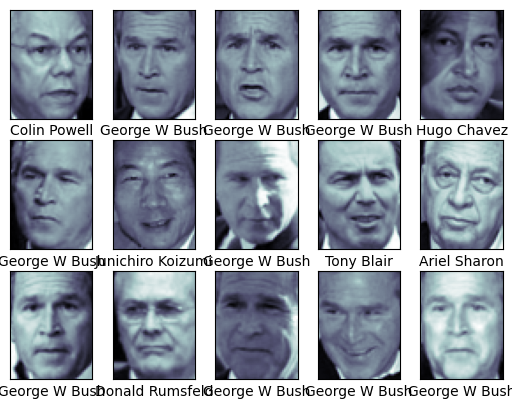

In [10]:
# Let’s plot a few of these faces to see what we’re working with:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

# fig, ax = plt.subplots(3, 5)
# for i, axi in enumerate(ax.flat):
#     axi.imshow(image_data[i], cmap='bone')
#     axi.set(xticks=[], yticks=[], xlabel=target_name[i])

In [12]:
# P: It's important to redduce the features
# we extract 150 fundamental components to feed into our support vector machine classifier. We  
# can do this most straightforwardly by packaging the preprocessor and the classifier into 
# a single pipeline:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
# pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
pca = RandomizedPCA(n_components=150, svd_solver='randomized', whiten=True)#.fit(X_train)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [13]:
# For the sake of testing our classifier output, we will split the data into a training and
# testing set:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)
# Xtrain, Xtest, ytrain, ytest = train_test_split(image_data, target_name, random_state=42)

In [14]:
# Finally, we can use a grid search cross-validation to explore combinations of parameters. Here 
# we will adjust C (which controls the margin hardness) and gamma (which controls the size of the 
# radial basis function kernel), and determine the best model:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 2min 8s
Wall time: 1min 16s
{'svc__C': 5, 'svc__gamma': 0.001}


In [15]:
# Now with this cross-validated model, we can predict the labels for the test data, which
# the model has not yet seen:
model = grid.best_estimator_
yfit = model.predict(Xtest)

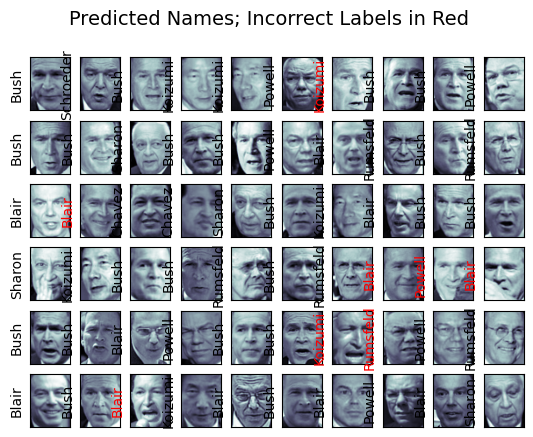

In [16]:
# Let’s take a look at a few of the test images along with their predicted values
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [17]:
# We can get a better sense of our estimator’s performance using the classification report, 
# which lists recovery statistics label by label:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.87      0.76        15
     Colin Powell       0.84      0.90      0.87        68
  Donald Rumsfeld       0.82      0.87      0.84        31
    George W Bush       0.95      0.82      0.88       126
Gerhard Schroeder       0.83      0.83      0.83        23
      Hugo Chavez       0.94      0.75      0.83        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.80      0.95      0.87        42

         accuracy                           0.86       337
        macro avg       0.83      0.87      0.85       337
     weighted avg       0.87      0.86      0.86       337



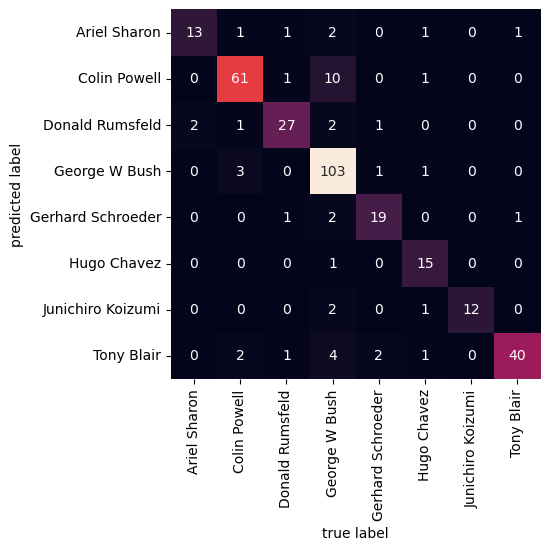

In [18]:
# We might also display the confusion matrix between these classes:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, 
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Decision Trees and Random Forests
a non‐
parametric algorithm called random forests. Random forests are an example of an
ensemble method, a method that relies on aggregating the results of an ensemble of
simpler estimators.

Tree-based learning algorithms are a broad and popular family of related nonparametric, supervised methods for both classification and regression. The basis of
tree-based learners is the decision tree wherein a series of decision rules (e.g., “If their
gender is male…”) are chained.

In [3]:
# Training a Decision Tree Classifer
# Problem: You need to train a classifier using a decision tree.
# Solution: Use scikit-learn’s DecisionTreeClassifier:

        # Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)
# Train model
model = decisiontree.fit(features, target)

In [20]:
# after the model is trained using fit we can use the model to predict the class of an observation:
# Make new observation
observation = [[ 5, 4, 3, 2]]
# Predict observation's class
model.predict(observation)

array([1])

In [22]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

# coming to an activator

array([[0., 1., 0.]])

In [23]:
# Finally, if we want to use a different impurity measurement we can use the criterion parameter:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
# Train model
model_entropy = decisiontree_entropy.fit(features, target)

In [24]:
# Training a Decision Tree Regressor
# Problem: You need to train a regression model using a decision tree.
# Solution: Use scikit-learn’s DecisionTreeRegressor:

        # Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
# Load data with only two features
# boston = datasets.load_boston()
boston = fetch_california_housing()
features = boston.data[:,0:2]
target = boston.target
# Create decision tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)
# Train model
model = decisiontree.fit(features, target)

In [25]:
# Once we have trained a decision tree, we can use it to predict the target value for an observation:
# Make new observation
observation = [[0.02, 16]]
# Predict observation's value
model.predict(observation)

array([0.735])

In [26]:
DecisionTreeRegressor??

In [27]:
# we can construct a tree whose splits return mean absolute error (MAE):

# Create decision tree classifier object using entropy
decisiontree_mae = DecisionTreeRegressor(criterion="absolute_error", random_state=0)
# Train model
model_mae = decisiontree_mae.fit(features, target)

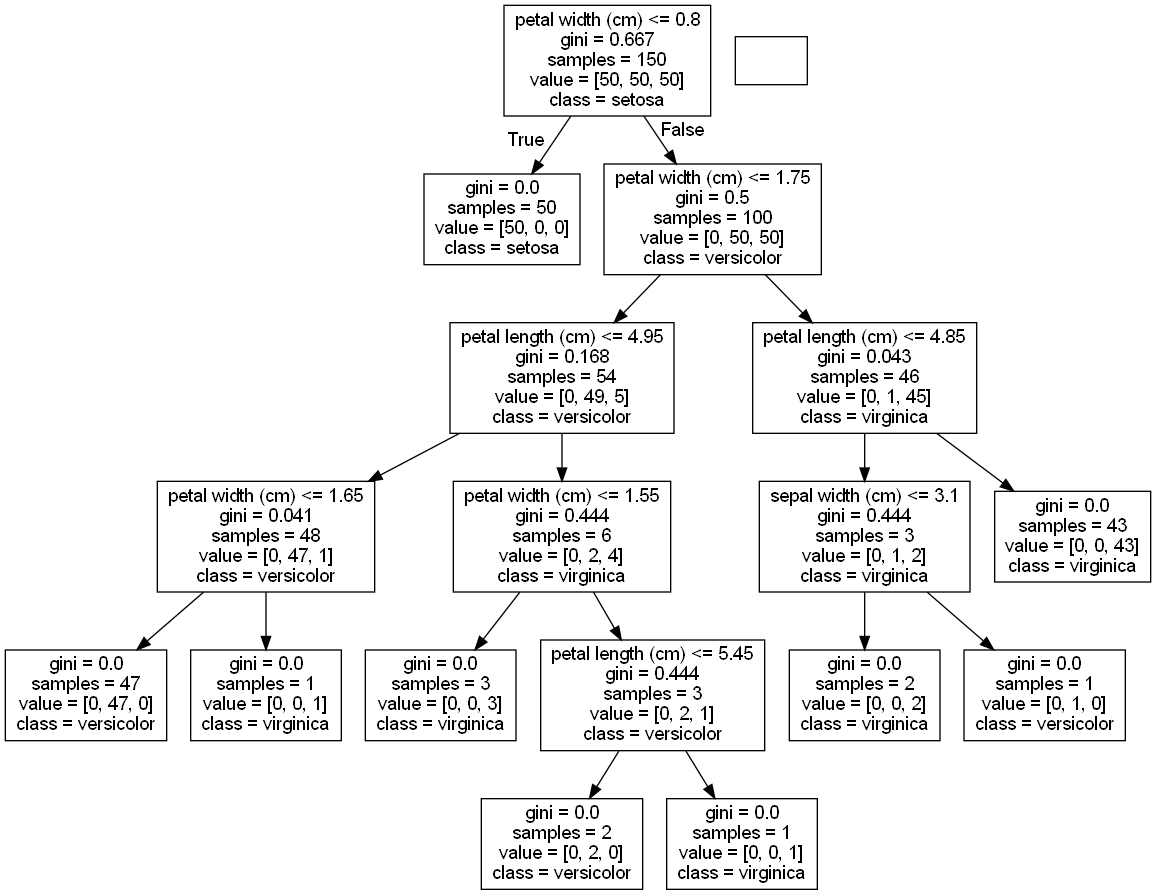

In [5]:
# Visualizing a Decision Tree Model
# Problem: You need to visualize a model created by a decision tree learning algorithm.
# Solution: Export the decision tree model into DOT format, then visualize:
# For pydotplus to work install the following libraries 
# pip install pydotplus
# conda install graphviz
# pip install graphviz

# Load libraries
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)
# Train model
model = decisiontree.fit(features, target)
# Create DOT data
dot_data = tree.export_graphviz(decisiontree, out_file=None, feature_names=iris.feature_names,
                                class_names=iris.target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [6]:
# If we want to use the decision tree in other applications or reports, we can easily export the
# visualization into PDF or a PNG image:

# Create PDF
graph.write_pdf("iris.pdf")

True

In [8]:
# Create PNG
graph.write_png("iris.png")

# if i want to upload it into my report

True

In [9]:
# Training a Random Forest Classifer
# Problem: You want to train a classification model using a “forest” of randomized decision trees.
# Solution: Train a random forest classification model using scikit-learn’s RandomForestClassifier:

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)

In [10]:
# Make new observation
observation = [[ 5, 4, 3, 2]]
# Predict observation's class
model.predict(observation)

array([1])

In [11]:
# RandomForestClassifier also uses many of the same parameters as DecisionTree
# Classifier. For example, we can change the measure of split quality used:

# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)
# Train model
model_entropy = randomforest_entropy.fit(features, target)

In [12]:
# Training a Random Forest Regressor
# Problem: You want to train a regression model using a “forest” of randomized decision trees.
# Solution: Train a random forest regression model using scikit-learn’s RandomForestRegressor:

# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

# Load data with only two features
boston = fetch_california_housing()
features = boston.data[:,0:2]
target = boston.target
# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)

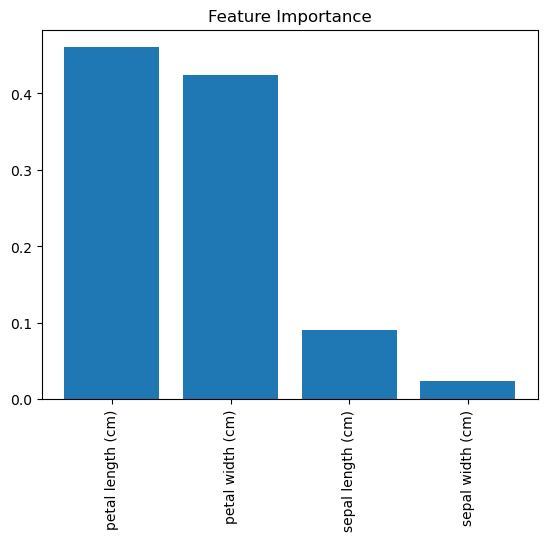

In [14]:
#  Identifying Important Features in Random Forests
# Problem: You need to know which features are most important in a random forest model.
# Solution: Calculate and visualize the importance of each feature:

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(features.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90);
# Show plot
plt.show()

In [15]:
# View feature importances
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [16]:
# Selecting Important Features in Random Forests
# Problem: You need to conduct feature selection on a random forest.
# Solution: Identify the importance features and retrain the model using only the most important
# features:

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)
# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)
# Train random forest using most important featres
model = randomforest.fit(features_important, target)

In [17]:
# Handling Imbalanced Classes
# Problem: You have a target vector with highly imbalanced classes and want to train a random
# forest model.
# Solution: Train a decision tree or random forest model with class_weight="balanced":

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# # Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
# Train model
model = randomforest.fit(features, target)

In [18]:
# If we weight the classes using class_weight="balanced", then the smaller class is weighted more:
# Calculate weight for small class
110/(2*10)

5.5

In [19]:
# while the larger class is weighted less:
# Calculate weight for large class
110/(2*100)

0.55

In [20]:
# Controlling Tree Size
# Problem: You want to manually determine the structure and size of a decision tree.
# Solution: Use the tree structure parameters in scikit-learn tree-based learning algorithms:

# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_split=2,
                                       min_samples_leaf=1, min_weight_fraction_leaf=0,
                                       max_leaf_nodes=None, min_impurity_decrease=0)
# Train model
model = decisiontree.fit(features, target)

In [21]:
DecisionTreeClassifier??

In [22]:
# Improving Performance Through Boosting
# Problem: You need a model with better performance than decision trees or random forests.
# Solution: Train a boosted model using AdaBoostClassifier or AdaBoostRegressor:

# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)
# Train model
model = adaboost.fit(features, target)

In [23]:
#  Evaluating Random Forests with Out-of-Bag Errors  (oob)
# Problem: You need to evaluate a random forest model without using cross-validation.
# Solution: Calculate the model’s out-of-bag score:

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random tree classifier object
randomforest = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# View out-of-bag-error
randomforest.oob_score_

0.9533333333333334

In [24]:
# We begin with the standard imports:
import seaborn as sns; sns.set()

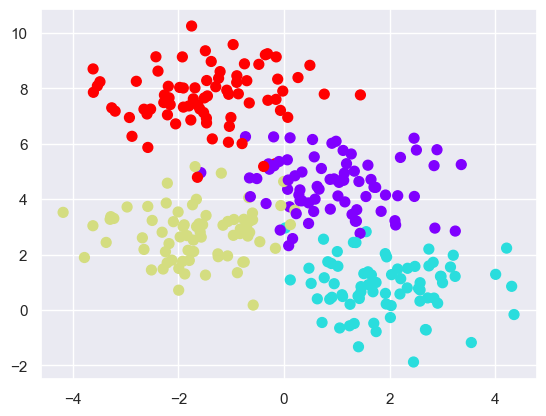

In [33]:
# Creating a decision tree
# Consider the following two-dimensional data, which has one of four class labels
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [34]:
# This process of fitting a decision tree to our data can be done in Scikit-Learn with the
# DecisionTreeClassifier estimator:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [35]:
# Let’s write a quick utility function to help us visualize the output of the classifier:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

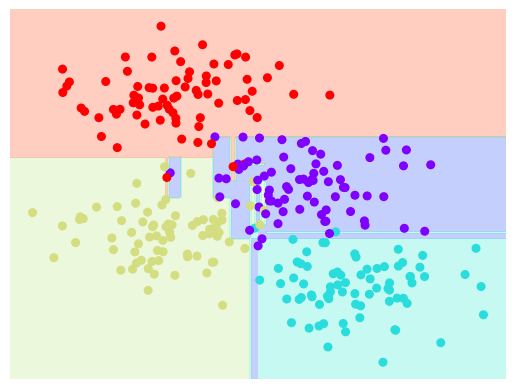

In [36]:
# Now we can examine what the decision tree classification looks like
visualize_classifier(DecisionTreeClassifier(), X, y)

In [40]:
# you can use the helpers script to bring up an interactive visualization of the decision tree
# building process 
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

In [41]:
# Decision trees and overftting
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

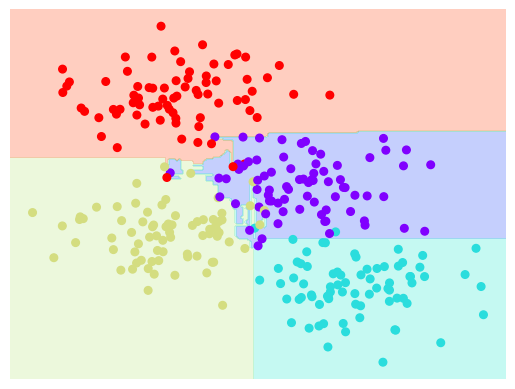

In [43]:
# Ensembles of Estimators: Random Forests
# This notion that multiple overfitting estimators can be combined to reduce the effect of this 
# overfitting is what underlies an ensemble method called bagging. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

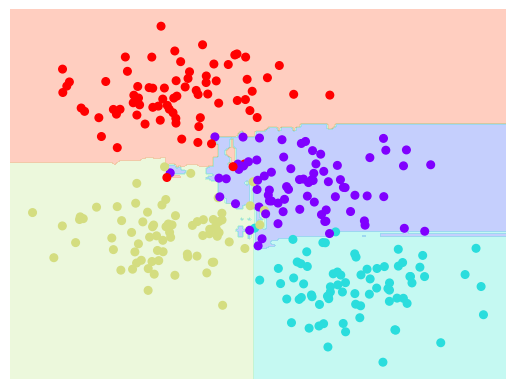

In [44]:
# In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the
# RandomForestClassifier estimator, which takes care of all the randomization automatically.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

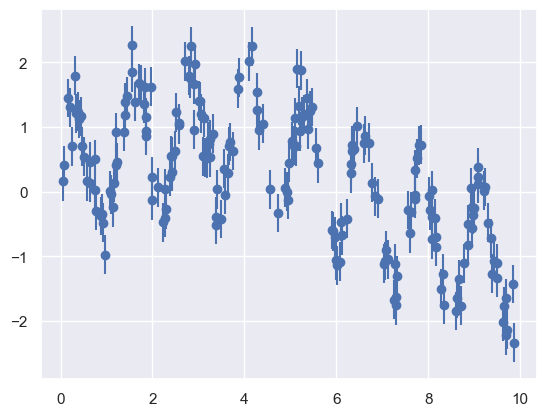

In [45]:
# Random Forest Regression
# Random forests can also be made to work in the case of regression (that is, continuous rather 
# than categorical variables). The estimator to use for this is the RandomForestRegressor
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

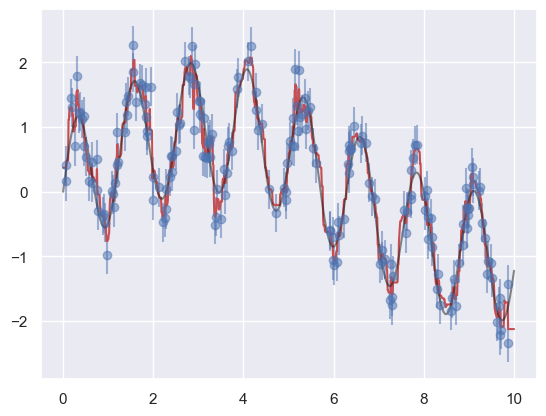

In [46]:
# Using the random forest regressor, we can find the best-fit curve as follows
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

# Practical Example: Random Forest for Classifying Digits

In [47]:
# Let’s use that again here to see how the random forest classifier can be used in this context.
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

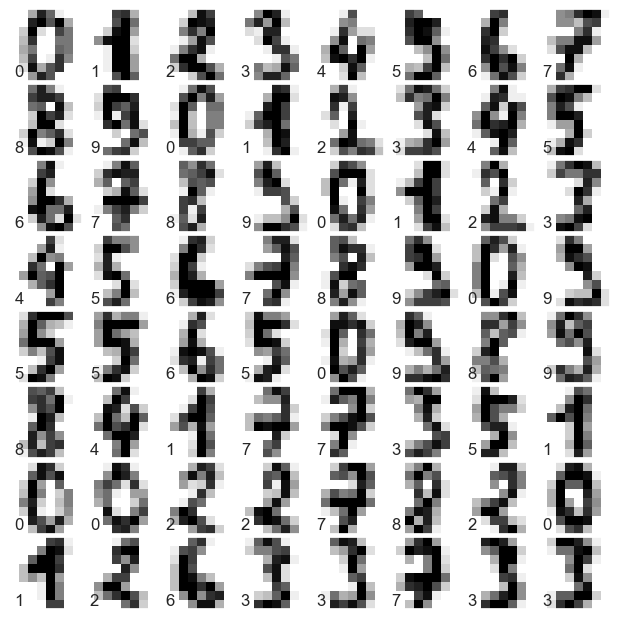

In [48]:
# To remind us what we’re looking at, we’ll visualize the first few data points
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [49]:
# We can quickly classify the digits using a random forest as follows
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [50]:
# We can take a look at the classification report for this classifier:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



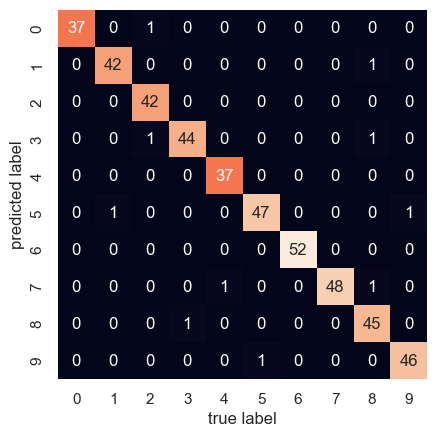

In [51]:
# And for good measure, plot the confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# K-Nearest Neighbors
KNN doesn’t technically train a model to make predictions. Instead an observation is predicted to be the class of that of the largest proportion of the k nearest observations. For example, if an observation with an unknown class is surrounded by an observation of class 1, then the observation is classified as class 1. 

In [52]:
# Finding an Observation’s Nearest Neighbors
# Problem: You need to find an observation’s k nearest observations (neighbors).
# Solution: Use scikit-learn’s NearestNeighbors:

        # Load libraries
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)
# Create an observation
new_observation = [ 1, 1, 1, 1]
# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])
# View the nearest neighbors
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

In [55]:
# We can set the distance metric using the metric parameter:
# Find two nearest neighbors based on euclidean distance
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2, metric='euclidean').fit(features_standardized)
# View distances
distances

array([[0.49140089, 0.74294782]])

In [56]:
# In addition, we can use kneighbors_graph to create a matrix indicating each observation’s 
# nearest neighbors:
# Find each observation's three nearest neighbors
# based on euclidean distance (including itself)
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(features_standardized)
# List of lists indicating each observation's 3 nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(features_standardized).toarray()
# Remove 1's marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0
# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
# Creating a K-Nearest Neighbor Classifer
# Problem: Given an observation of unknown class, you need to predict its class based on the
# class of its neighbors.
# Solution: If the dataset is not very large, use KNeighborsClassifier:

# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
X_std = standardizer.fit_transform(X)
# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)
# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
[ 1, 1, 1, 1]]
# Predict the class of two observations
knn.predict(new_observations)

array([1, 2])

In [58]:
# View probability each observation is one of three classes
knn.predict_proba(new_observations)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

In [59]:
# Identifying the Best Neighborhood Size
# Problem: You want to select the best value for k in a k-nearest neighbors classifier.
# Solution: Use model selection techniques like GridSearchCV:

        # Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(features_standardized, target)

In [61]:
# When that is completed, we can see the k that produces the best model:
# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

In [14]:
# Creating a Radius-Based Nearest Neighbor Classifer
# Problem: Given an observation of unknown class, you need to predict its class based on the
# class of all observations within a certain distance.
# Solution: Use RadiusNeighborsClassifier:

        # Load libraries
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(features_standardized, target)
# Create two observations
new_observations = [[ 1, 1, 1, 1]]
# Predict the class of two observations
rnn.predict(new_observations)

array([2])

# Principal Component Analysis
one of the most broadly used of unsupervised algorithms is principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool 
for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [2]:
# We begin with the standard imports:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt

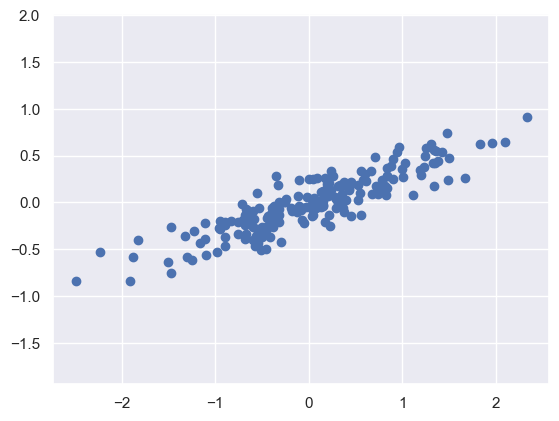

In [3]:
# PCA behavior is easiest to visualize by looking at a two-dimensional dataset. Consider 
# the following 200 points:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [6]:
# Using Scikit-Learn’s PCA estimator, we can compute this as follows:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [7]:
# The fit learns some quantities from the data, most importantly the “components” and “explained variance”:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


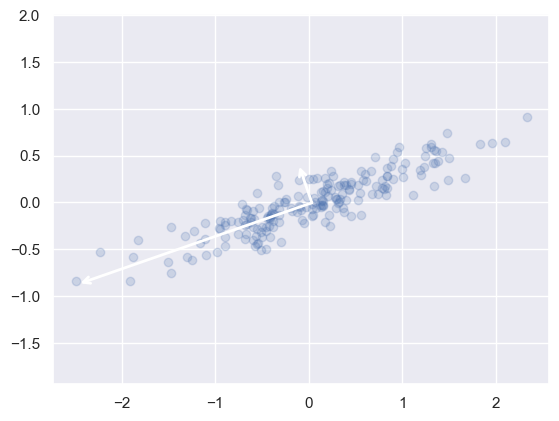

In [8]:
# To see what these numbers mean, let’s visualize them as vectors over the input data, using the 
# “components” to define the direction of the vector, and the “explained variance” to define the 
# squared-length of the vector
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [9]:
# PCA as dimensionality reduction
# Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal 
# components, resulting in a lower-dimensional projection of the data that preserves the maximal 
# data variance.
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


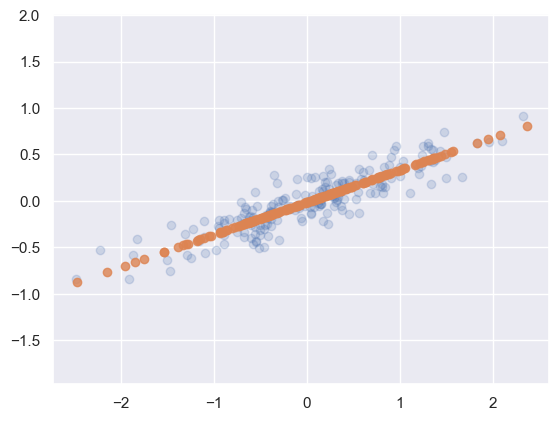

In [10]:
# To understand the effect of this dimensionality reduction, we can perform the inverse transform
# of this reduced data and plot it along with the original data
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [11]:
# PCA for visualization: Handwritten digits
# let’s take a quick look at the application of PCA to the digits data. let's loading the data:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
# To gain some intuition into the relationships between these points, we can use PCA to project 
# them to a more manageable number of dimensions, say two:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


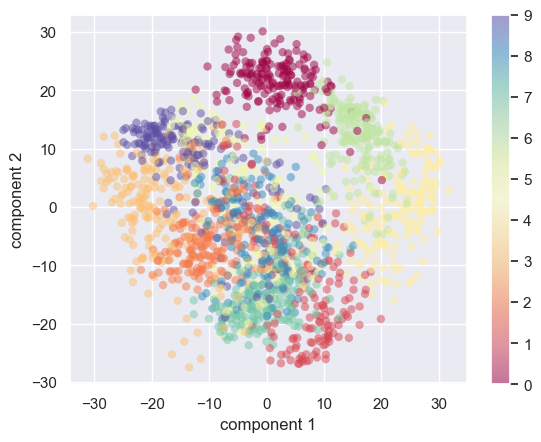

In [13]:
# We can now plot the first two principal components of each point to learn about the data:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=plt.colormaps.get_cmap('Spectral'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# c=digits.target- to give each of the target variable color
# alpha- transparency 

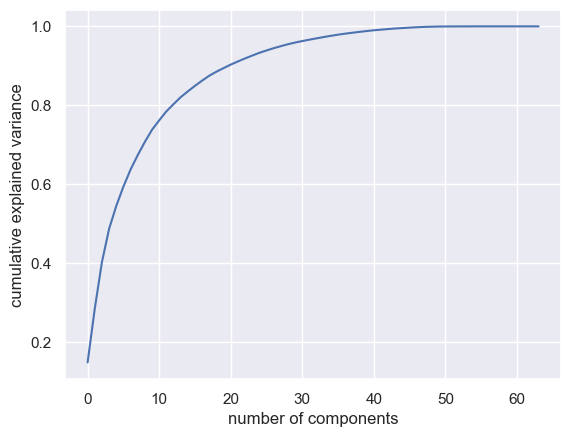

In [15]:
# Choosing the number of components
# A vital part of using PCA in practice is the ability to estimate how many components are needed 
# to describe the data. We can determine this by looking at the cumulative explained variance ratio
# as a function of the number of components:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
# we reduce to 45

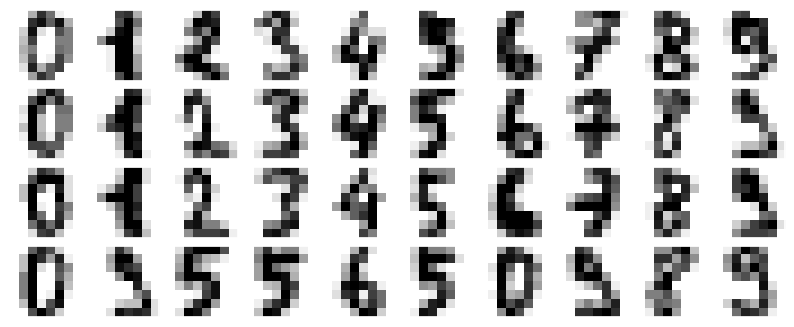

In [16]:
# PCA as Noise Filtering
# PCA can also be used as a filtering approach for noisy data. 
# Let’s see how this looks with the digits data. First we will plot several of the input noise-free data:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

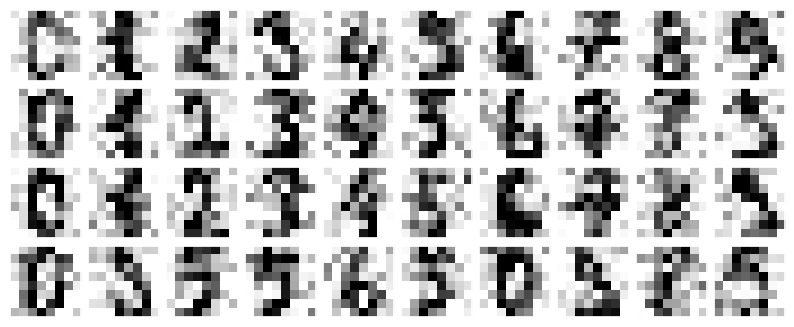

In [17]:
# Now let’s add some random noise to create a noisy dataset, and replot it
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [18]:
# It’s clear by eye that the images are noisy, and contain spurious pixels. Let’s train a
# PCA on the noisy data, requesting that the projection preserve 50% of the variance:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

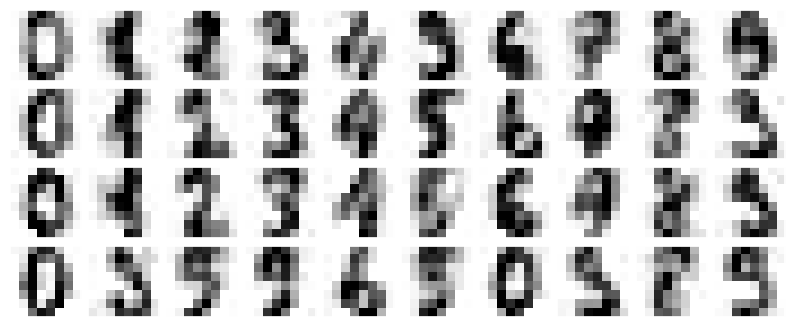

In [19]:
# Here 50% of the variance amounts to 12 principal components. Now we compute these components, and
# then use the inverse of the transform to reconstruct the filtered digits:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Practical Example: Eigenfaces

In [20]:
# we will use the Labeled Faces in the Wild dataset made available through Scikit-Learn:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [21]:
# Let’s take a look at the principal axes that span this dataset. Because this is a large
# dataset (there, a dimensionality of nearly 3,000). We will take a look at the first 150 components: 
# we will use RandomizedPCA
from sklearn.decomposition import PCA as RandomizedPCA
#pca = RandomizedPCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

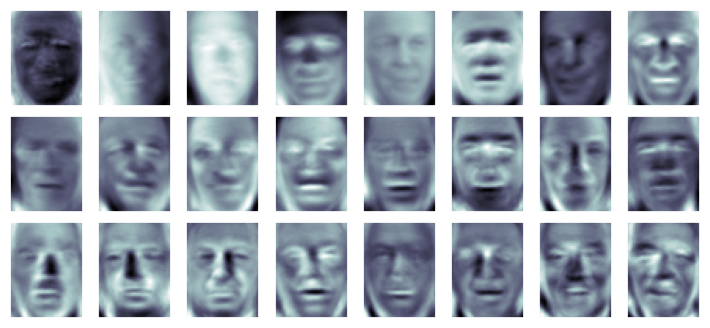

In [22]:
# In this case, it can be interesting to visualize the images associated with the first several 
# principal components (these components are technically known as “eigenvectors,” so these types of 
# images are often called “eigenfaces”).
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

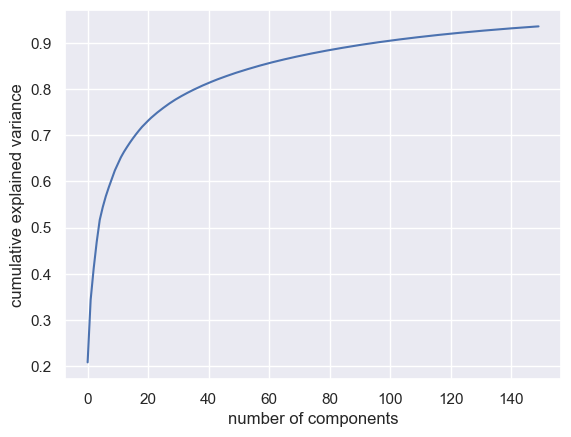

In [23]:
# Let’s take a look at the cumulative variance of these components to see how much of the data 
# information the projection is preserving:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

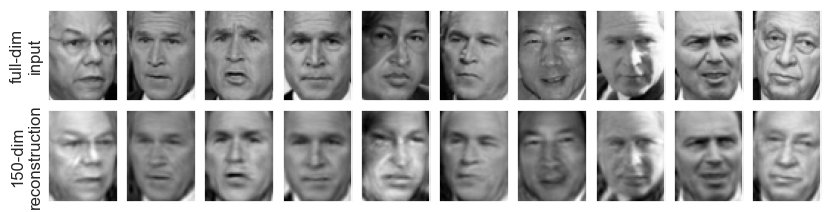

In [24]:
# To make this more concrete, we can compare the input images with the images reconstructed from 
# these 150 components
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, 
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    ax[0, 0].set_ylabel('full-dim\ninput')
    ax[1, 0].set_ylabel('150-dim\nreconstruction');

# Manifold Learning
manifold learning—a class of unsupervised estimators that seeks to describe datasets as low
dimensional manifolds embedded in high-dimensional spaces. Manifold learning algorithms would 
seek to learn about the fundamental two dimensional nature of the paper, even as it is contorted 
to fill the three-dimensional space.

it is also dimensionality reduction

In [25]:
# let’s start by generating some two-dimensional data that we can use to define a manifold. 
# Here is a function that will create data in the shape of the word “HELLO”:
import seaborn as sns; sns.set()
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

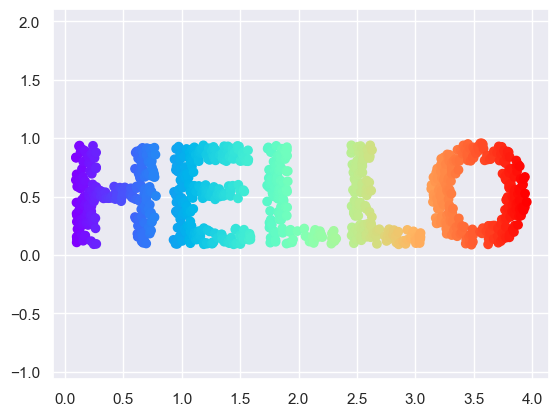

In [26]:
# Let’s call the function and visualize the resulting data:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.colormaps.get_cmap('rainbow'))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

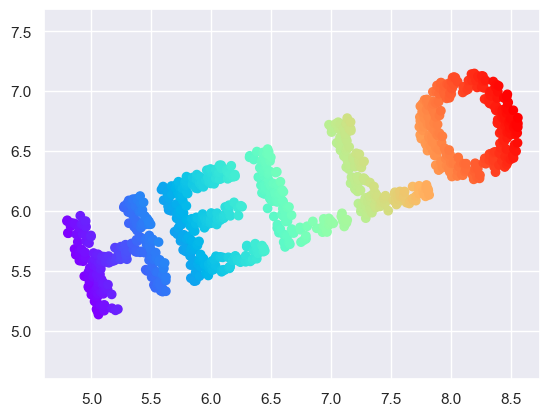

In [27]:
# Multidimensional Scaling (MDS)
# if we use a rotation matrix to rotate the data, the x and y values change, but the data is still 
# fundamentally the same
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [28]:
    # What is fundamental, in this case, is the distance. Let’s use Scikit-Learn’s efficient pair 
    # wise_distances function to do this for our original data:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape 

(1000, 1000)

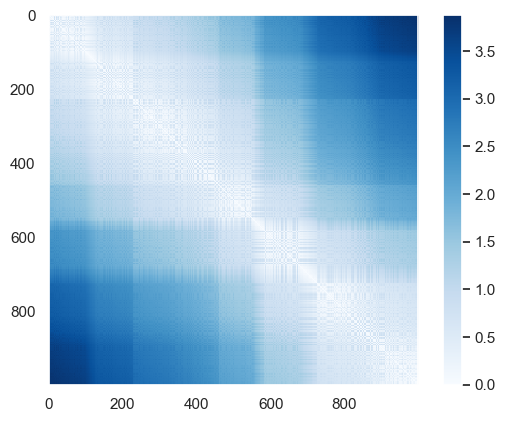

In [29]:
# As promised, for our N=1,000 points, we obtain a 1,000×1,000 matrix, which can be visualized as shown below
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [30]:
# If we similarly construct a distance matrix for our rotated and translated data, we see that 
# it is the same:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

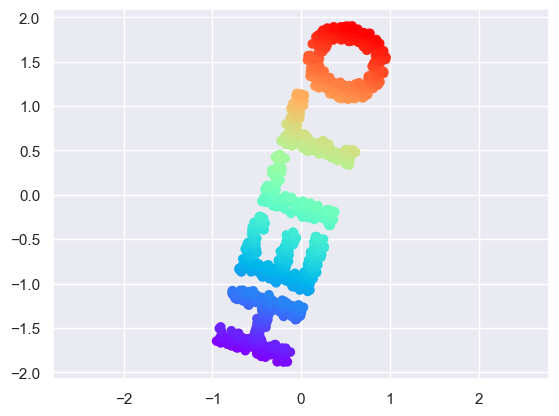

In [31]:
# Let’s see how it works for our distance matrix, using the precomputed dissimilarity to specify 
# that we are passing a distance matrix 
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1, normalized_stress="auto")
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [32]:
# MDS as Manifold Learning
# So, for example, instead of simply rotating the data in the two-dimensional plane, we can project 
# it into three dimensions using the following function 
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

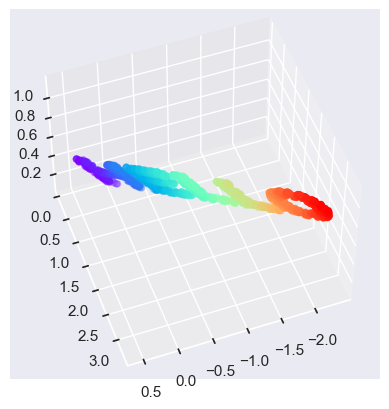

In [33]:
# Let’s visualize these points to see what we’re working with:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

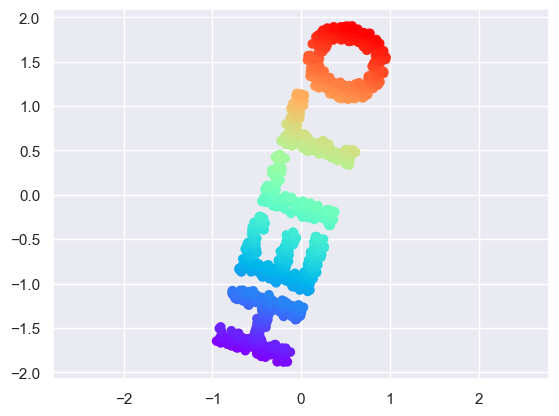

In [34]:
# We can now ask the MDS estimator to input this three-dimensional data, compute the
# distance matrix, and then determine the optimal two-dimensional embedding for this
# distance matrix.
model = MDS(n_components=2, random_state=1, normalized_stress="auto")
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

In [36]:
# Nonlinear Embeddings: Where MDS Fails
# MDS breaks down is when the embedding is nonlinear—that is, when it goes beyond this simple set
# of operations. Consider the following embedding, which takes the input and contorts it into 
# an “S” shape in three dimensions:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
XS = make_hello_s_curve(X)

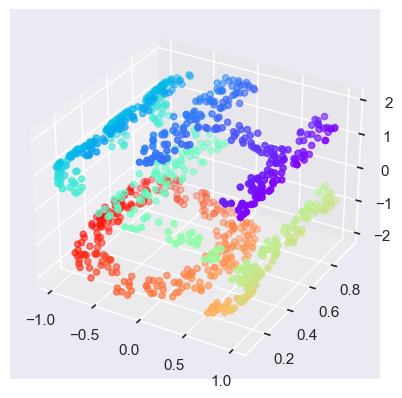

In [37]:
# This is again three-dimensional data, but we can see that the embedding is much more complicated
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);

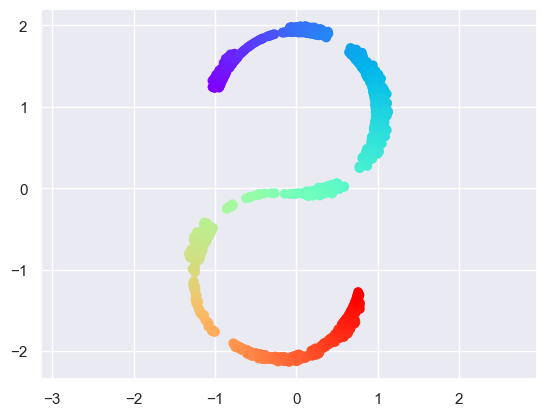

In [38]:
# If we try a simple MDS algorithm on this data, it is not able to “unwrap” this nonlinear 
# embedding, and we lose track of the fundamental relationships in the embedded manifold 
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2, normalized_stress="auto")
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

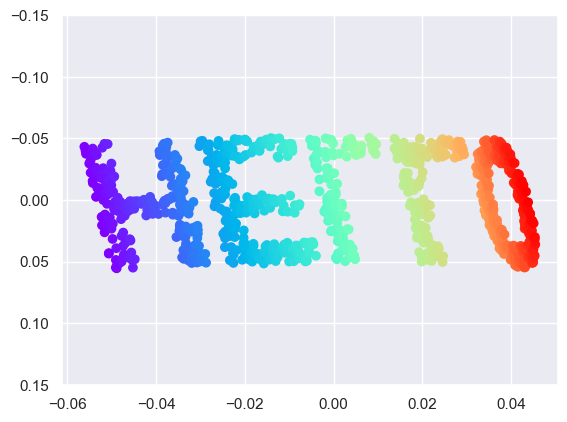

In [39]:
# Nonlinear Manifolds: Locally Linear Embedding
# But what if we instead modified the algorithm such that it only preserves distances between 
# nearby points
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# Practical Example 1: Isomap on Faces

In [40]:
# let’s apply Isomap on some faces data. We will use the Labeled Faces in the Wild dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

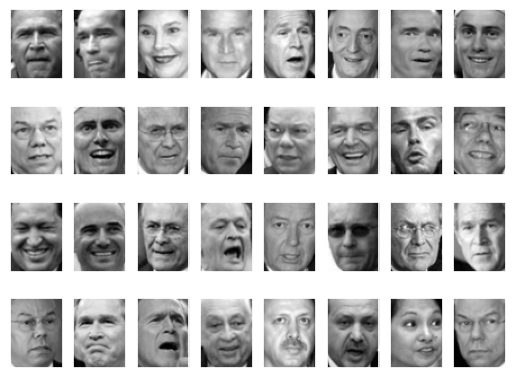

In [41]:
# Let’s quickly visualize several of these images to see what we’re working with
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

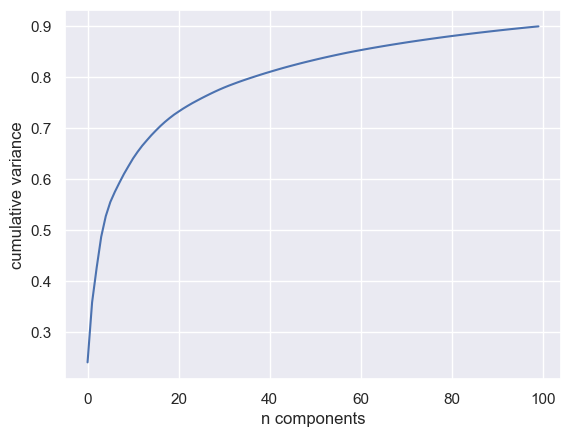

In [42]:
# We would like to plot a low-dimensional embedding of the 2,914-dimensional data to learn the 
# fundamental relationships between the images. One useful way to start is to compute a PCA, and 
# examine the explained variance ratio, which will give us an idea of how many linear features are 
# required to describe the data
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [43]:
# We can compute an Isomap embedding on these faces using the same pattern shown before:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [44]:
# To get a better idea of what the projection tells us, let’s define a function that will output 
# image thumbnails at the locations of the projections:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
            ax.add_artist(imagebox)

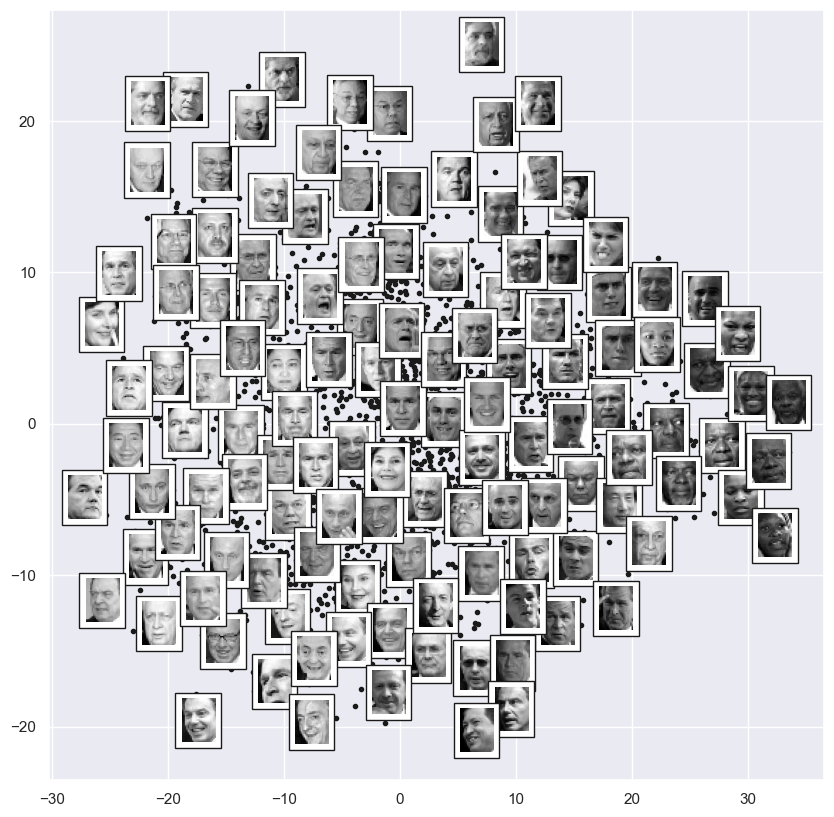

In [45]:
# Calling this function now, we see the result:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

# Practical Example 2: Visualizing Structure in Digits

In [47]:
# As another example of using manifold learning for visualization, let’s take a look at the MNIST
# handwritten digits set.
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist-original')
# from sklearn.datasets import fetch_mldata 
# mnist = fetch_mldata("MNIST Original")
# mnist.data.shape2
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='auto')
x = mnist.data
y = mnist.target

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
# This consists of 70,000 images, each with 784 pixels (i.e., the images are 28×28). As
# before, we can take a look at the first few images:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data.values[1250 * i].reshape(28, 28), cmap='gray_r')

In [ ]:
# Let’s compute a manifold learning projection across the data. For speed here, we’ll only use 
# 1/30 of the data, which is about ~2,000 points
from sklearn.manifold import Isomap
data = mnist.data[::30]
target = mnist.target[::30]
model = Isomap(n_components=2)
proj = model.fit_transform(data)

In [ ]:
# Let's now try to vitualize this on a plot
tar = [int(i) for i in target]
plt.scatter(proj[:, 0], proj[:, 1], c=tar, cmap=plt.colormaps.get_cmap('jet'))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

In [ ]:
# We can gain more insight by looking at just a single number at a time 
from sklearn.manifold import Isomap
# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target == '1'][::4]
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data.values, model, images=data.values.reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')

# Clustering
The goal of clustering algorithms is to identify those latent groupings of observations,
which if done well, allow us to predict the class of observations even without a target
vector. There are many clustering algorithms and they have a wide variety of
approaches to identifying the clusters in data.

# k-Means Clustering
Clustering algorithms Machine Learning seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.
Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps
the simplest to understand is an algorithm known as k-means clustering, which is
implemented in sklearn.cluster.KMeans.

In [48]:
# k-Means
# The k-means algorithm searches for a predetermined number of clusters within an unlabeled 
# multidimensional dataset. It accomplishes this using a simple conception:
# • The “cluster center” is the arithmetic mean of all the points belonging to the
# cluster.
# • Each point is closer to its own cluster center than to other cluster centers.
import seaborn as sns; sns.set() # for plot styling

In [49]:
# Clustering Using K-Means
# Problem: You want to group observations into k groups.
# Solution: Use k-means clustering:

# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create k-mean object
cluster = KMeans(n_clusters=3, random_state=0, n_init='auto')  #(n_clusters=3 - we have three classes in the dataset 
# Train model
model = cluster.fit(features_std)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
# View predict class
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [51]:
# View true class
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
# # Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]
# Predict observation's cluster
model.predict(new_observation)

array([2])

In [53]:
#  We can even use cluster_centers_ to see those center points:
# View cluster centers
model.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [54]:
# Speeding Up K-Means Clustering
# Problem: You want to group observations into k groups, but k-means takes too long.
# Solution: Use mini-batch k-means:

# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create k-mean object
cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100, n_init='auto')
# Train model
model = cluster.fit(features_std)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 512 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


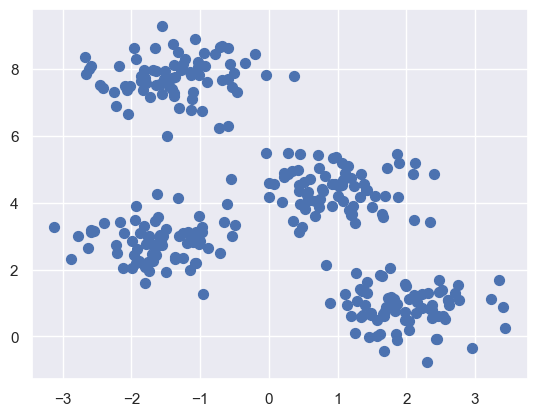

In [55]:
# First, let’s generate a two-dimensional dataset containing four distinct blobs. To emphasize that
# this is an unsupervised algorithm, we will leave the labels out of the visualization
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [56]:
# By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does
# this automatically
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

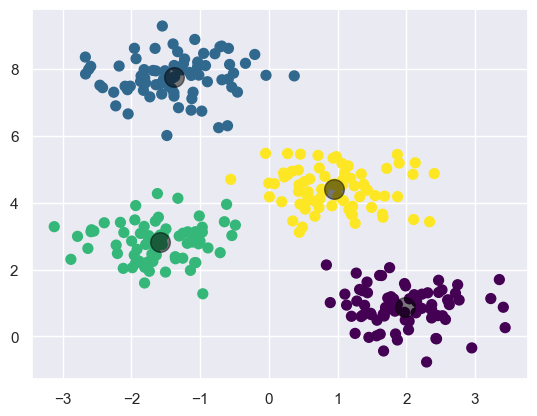

In [57]:
# Let’s visualize the results by plotting the data colored by these labels. We will also plot
# the cluster centers as determined by the k-means estimator
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

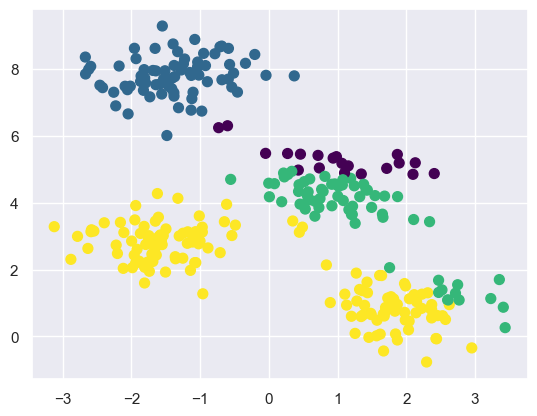

In [58]:
# k-Means Algorithm: Expectation–Maximization
# the expectation–maximization approach consists of the following procedure:
# 1. Guess some cluster centers
# 2. Repeat until converged
# a. E-Step: assign points to the nearest cluster center
# b. M-Step: set the cluster centers to the mean
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

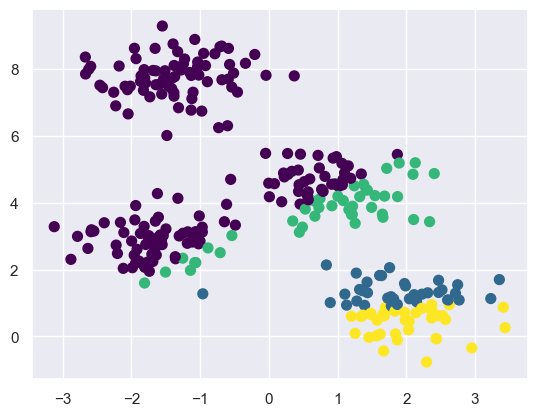

In [59]:
# although the E–M procedure is guaranteed to improve the result in each step but it will lead to 
# the global best solution. if we use a different random seed in our simple procedure, the
# particular starting guesses lead to poor results:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

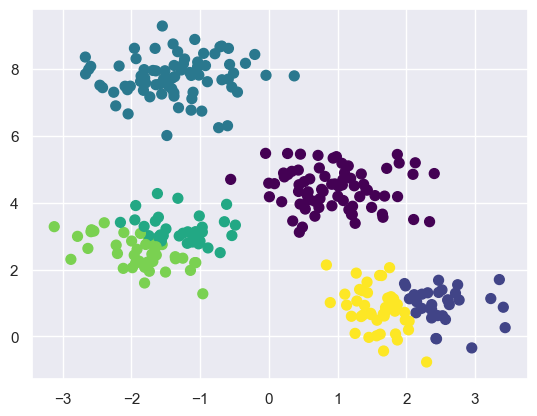

In [60]:
# Another common challenge with k-means is that you must tell it how many clusters you expect For
# example, if we ask the algorithm to identify six clusters:
labels = KMeans(6, random_state=0, n_init='auto').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


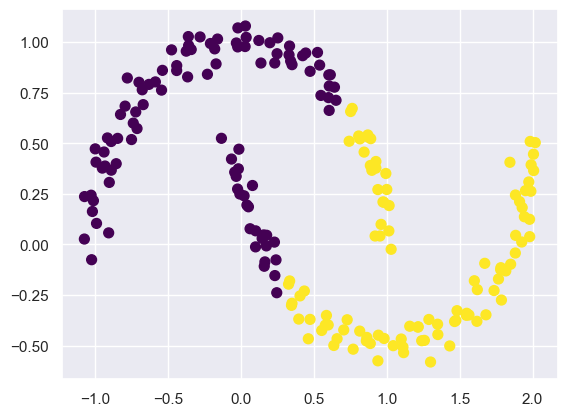

In [63]:
# In particular, the boundaries between k-means clusters will always be linear,
# which means that it will fail for more complicated boundaries.
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0, n_init='auto').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


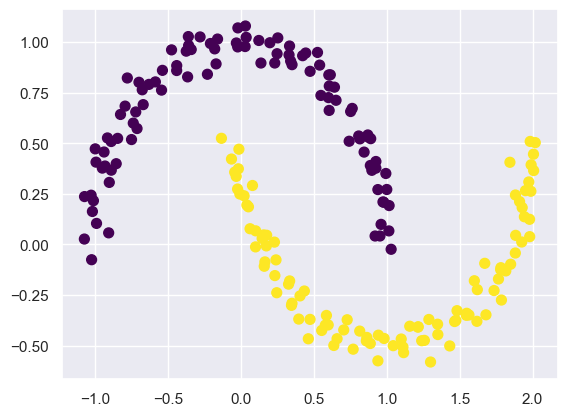

In [65]:
# We can use k-means to discover nonlinear boundaries. It uses the graph of nearest neighbors to 
# compute a higher-dimensional representation of the data, and then assigns labels using a k-means 
# algorithm
from sklearn.cluster import SpectralClustering  
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

# SpectralClustering - for non-linear 

# Practical Example 1: k-Means on digits

In [66]:
# Here we will attempt to use k-means to try to identify similar digits without using the original
# label information; We will start by loading the digits and then finding the KMeans clusters. 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [70]:
# The clustering can be performed as we did before:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
# clusters
kmeans.cluster_centers_.shape

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

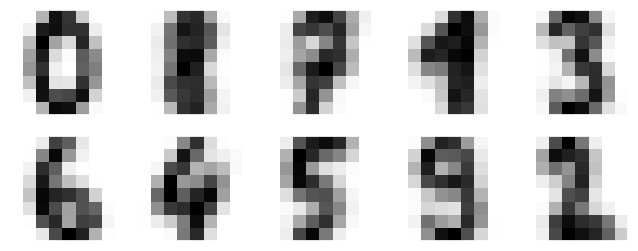

In [71]:
# Let’s see what these cluster centers look like:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [72]:
# Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. 
# We can fix this by matching each learned cluster label with the true labels found in them:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

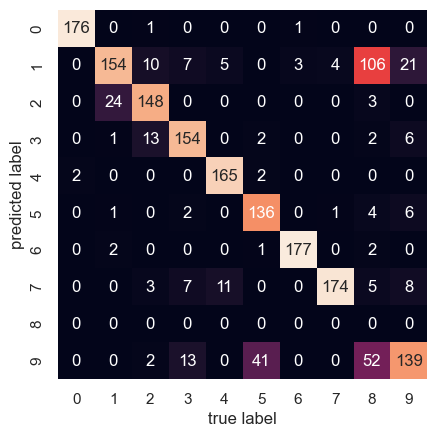

In [73]:
# Now we can check how accurate our unsupervised clustering was in finding similar
# digits within the data:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names,\
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [74]:
# We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to preprocess the 
# data before performing k-means.
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(digits_proj)
# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9410127991096272

# Practical Example 2: k-means for color compression

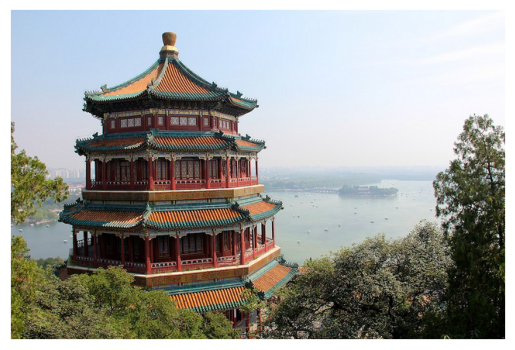

In [75]:
# For example, consider the image from Scikit-Learn’s datasets module (for this to work, you’ll
# have to have the pillow Python package installed):
# Note: this requires the pillow package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [76]:
# The image itself is stored in a three-dimensional array of size (height, width, RGB),
# containing red/blue/green contributions as integers from 0 to 255:
china.shape

(427, 640, 3)

In [77]:
# One way we can view this set of pixels is as a cloud of points in a three-dimensional
# color space. We will reshape the data to [n_samples x n_features], and rescale the
# colors so that they lie between 0 and 1:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

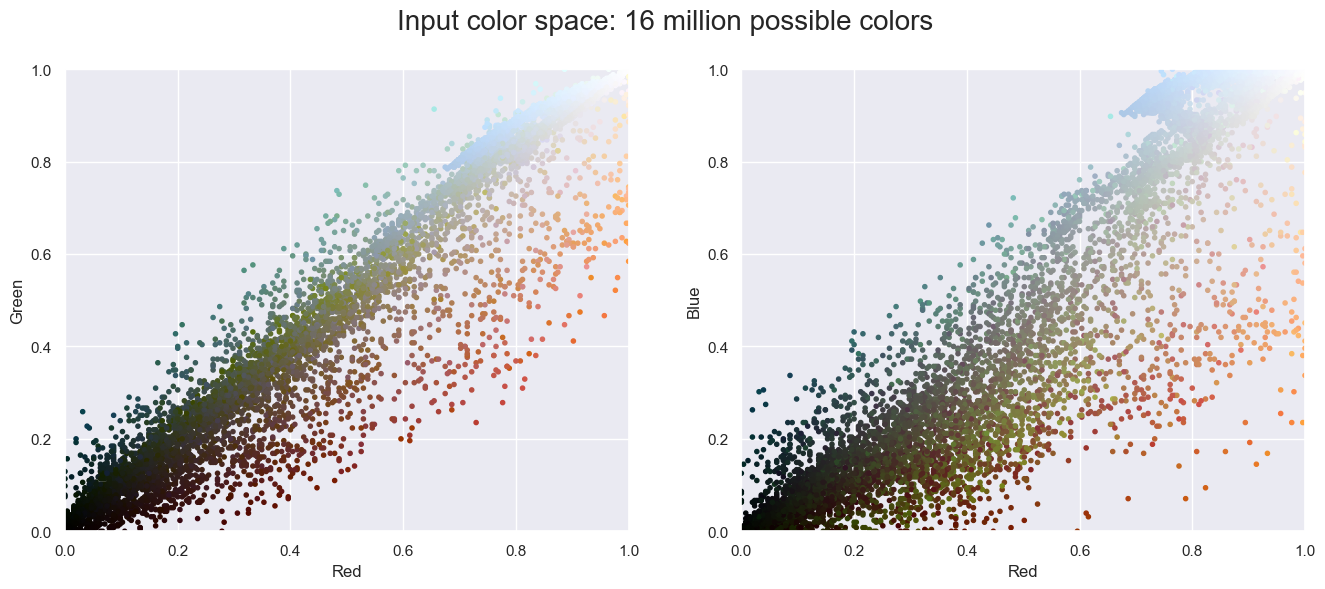

In [78]:
# We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency 
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);
plot_pixels(data, title='Input color space: 16 million possible colors')

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


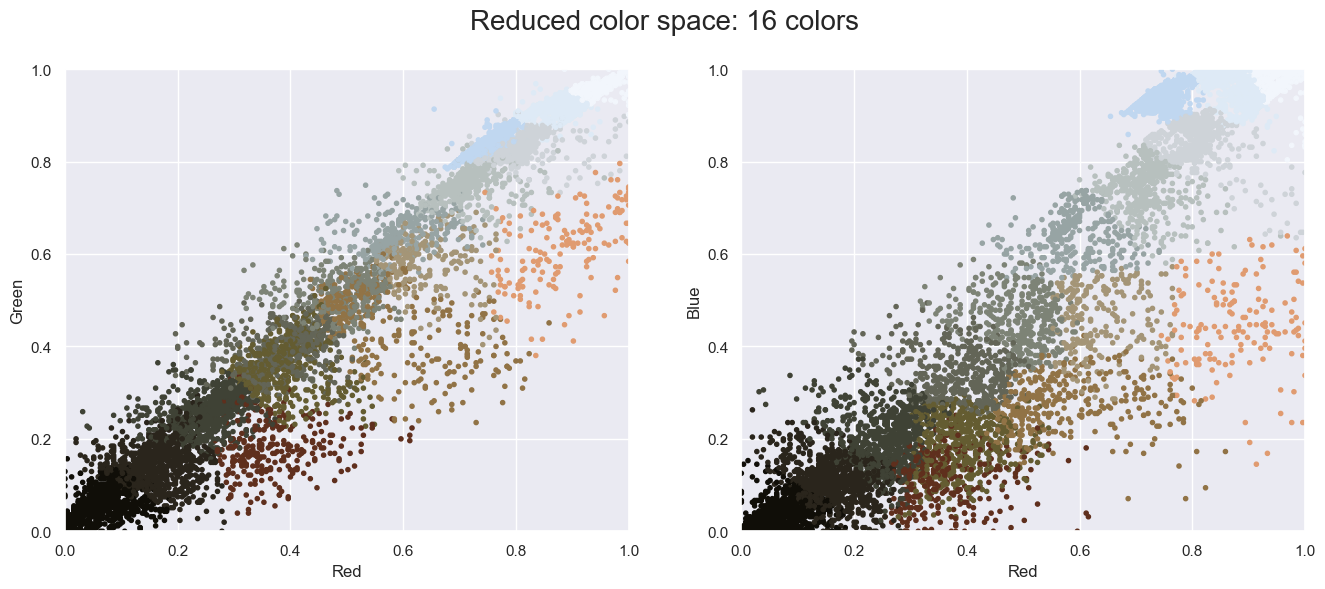

In [79]:
# Now let’s reduce these 16 million colors to just 16 colors, using a k-means clustering
# across the pixel space. we will use the mini batch k-means
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

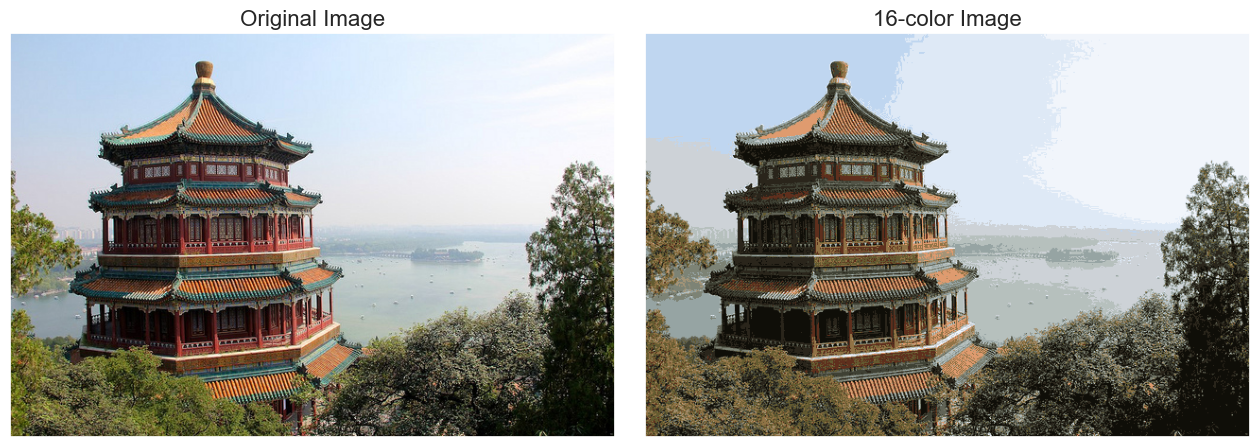

In [80]:
# Plotting these new colors in the image space rather than the pixel space shows us the effect of 
# this 
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

# Clustering Using Meanshift

In [81]:
# Problem: You want to group observations without assuming the number of clusters or their shape.
# Solution: Use meanshift clustering:

# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create meanshift object
cluster = MeanShift(n_jobs=-1)
# Train model
model = cluster.fit(features_std)

# Clustering Using DBSCAN

In [82]:
# Problem: You want to group observations into clusters of high density.
# Solution: Use DBSCAN clustering:

# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create meanshift object
cluster = DBSCAN(n_jobs=-1)
# Train model
model = cluster.fit(features_std)

In [83]:
# If we look at the clusters in our training data we can see two clusters have been identified, 
# 0 and 1, while outlier observations are labeled -1:
# Show cluster membership
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

# Clustering Using Hierarchical Merging

In [84]:
# Problem: You want to group observations using a hierarchy of clusters.
# Solution: Use agglomerative clustering:

# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create meanshift object
cluster = AgglomerativeClustering(n_clusters=3)
# Train model
model = cluster.fit(features_std)

# Gaussian Mixture Models
Gaussian mixture models, can be viewed as an extension of the ideas behind k-means, but can
also be a powerful tool for estimation beyond simple clustering.

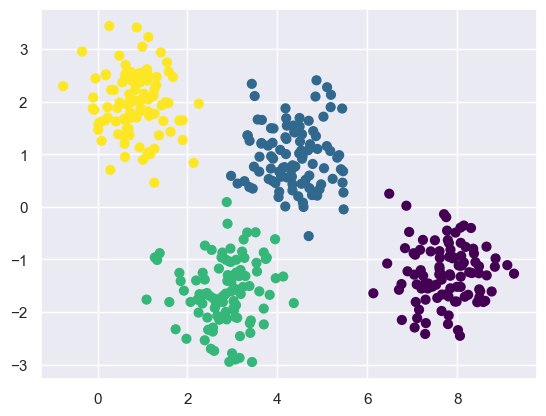

In [85]:
# Motivating GMM: Weaknesses of k-Means
# if we have simple blobs of data, the k-means algorithm can quickly label those clusters in a way
# that closely matches what we might do by eye 
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
# Plot the data with k-means labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0, n_init='auto')
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

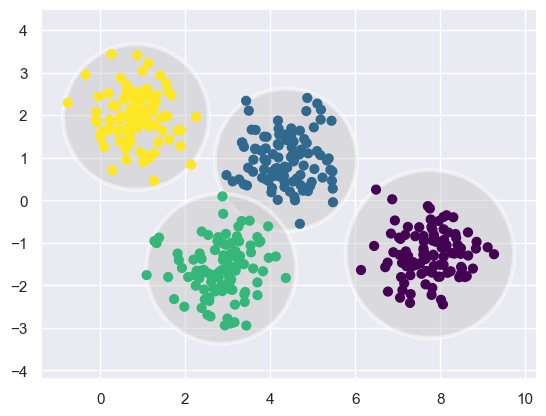

In [86]:
# We can visualize this cluster model with the following function
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
plot_kmeans(kmeans, X)

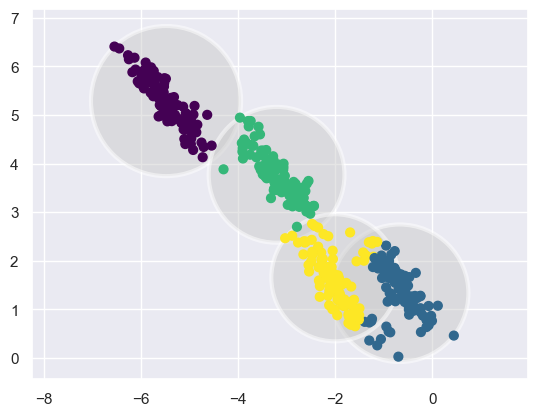

In [87]:
# if we take the same data and transform it, the cluster assignments end up becoming muddled:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
plot_kmeans(kmeans, X_stretched)

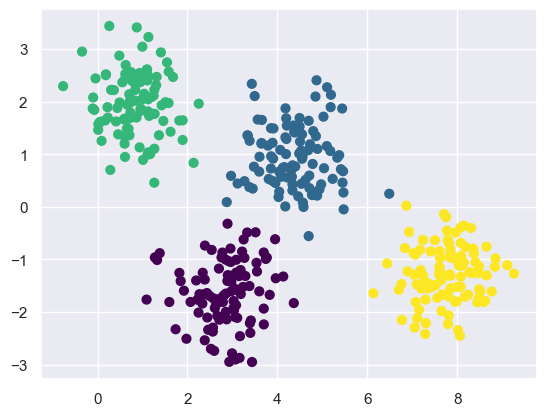

In [88]:
# Generalizing E–M: Gaussian Mixture Models
# A Gaussian mixture model (GMM) attempts to find a mixture of multidimensional Gaussian probability
# distributions that best model any input dataset. In the simplest case, GMMs can be used for 
# finding clusters in the same manner as k-means
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [90]:
# But because GMM contains a probabilistic model under the hood, it is also possible to find 
# probabilistic cluster assignments using the predict_proba method.
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.531 0.    0.469]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]]


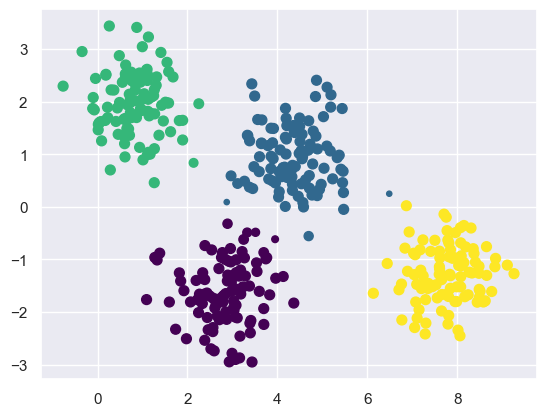

In [91]:
# We can visualize this uncertainty by, for example, making the size of each point pro‐
# portional to the certainty of its prediction
size = 50 * probs.max(1) ** 2 # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [92]:
# Let’s create a function that will help us visualize the locations and shapes of the GMM
# clusters by drawing ellipses based on the gmm output:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs))

In [93]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
        ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covariances, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covariances, alpha=w * w_factor)

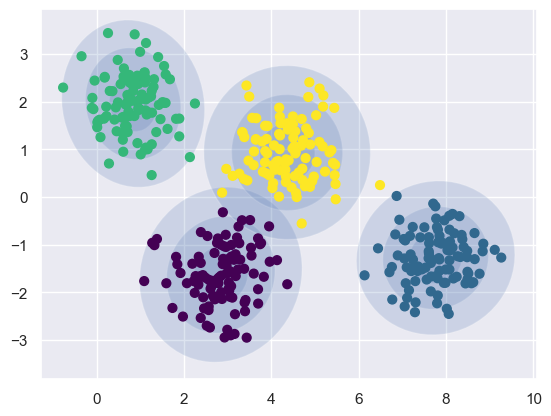

In [94]:
# With this in place, we can take a look at what the four-component GMM gives us for our initial data
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

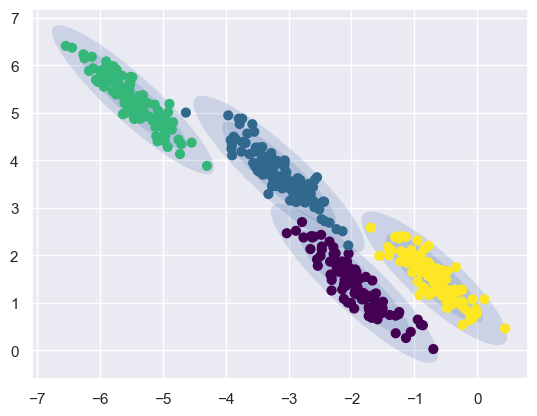

In [95]:
# Similarly, we can use the GMM approach to fit our stretched dataset; allowing for a full 
# covariance, the model will fit even very oblong, stretched-out clusters:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

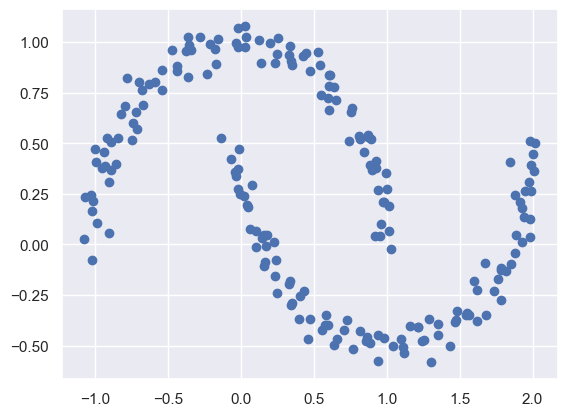

In [96]:
# GMM as Density Estimation
# As an example, consider some data generated from Scikit-Learn’s make_moons function 
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


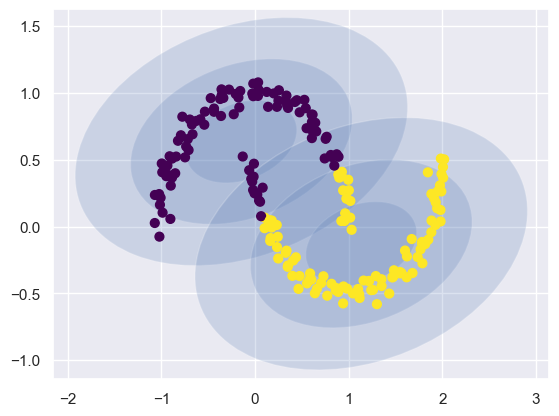

In [97]:
# If we try to fit this to a two-component GMM viewed as a clustering model, the results are not 
# particularly useful:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


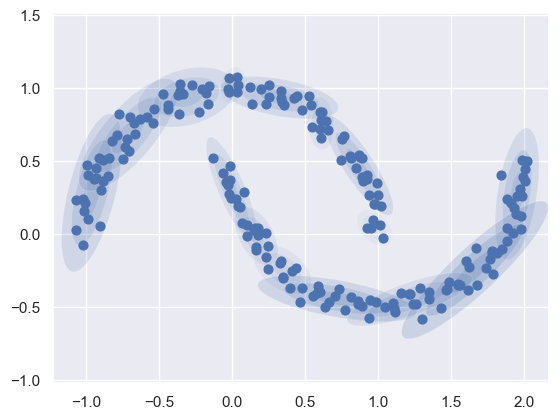

In [98]:
# But if we instead use many more components and ignore the cluster labels, we find a fit that is 
# much closer to the input data 
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

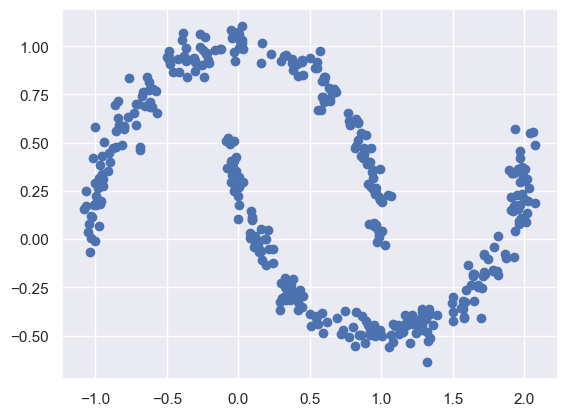

In [99]:
# For example, here are 400 new points drawn from this 16-component GMM fit to our original data 
Xnew = gmm16.sample(400)
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

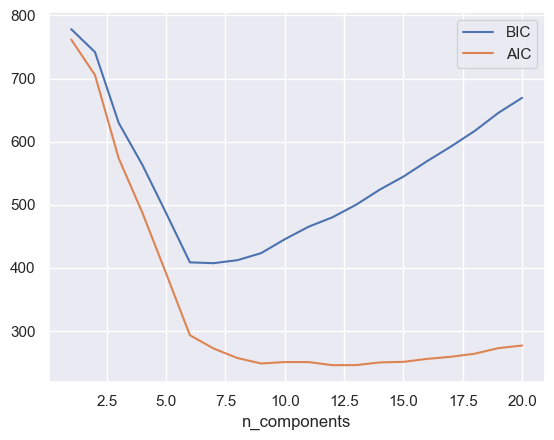

In [100]:
# Let’s look at the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) as a function as 
# the number of GMM components for our moon dataset

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]
plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# Practical Example: GMM for Generating New Data

In [76]:
# To start with, let’s load the digits data using Scikit-Learn’s data tools:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

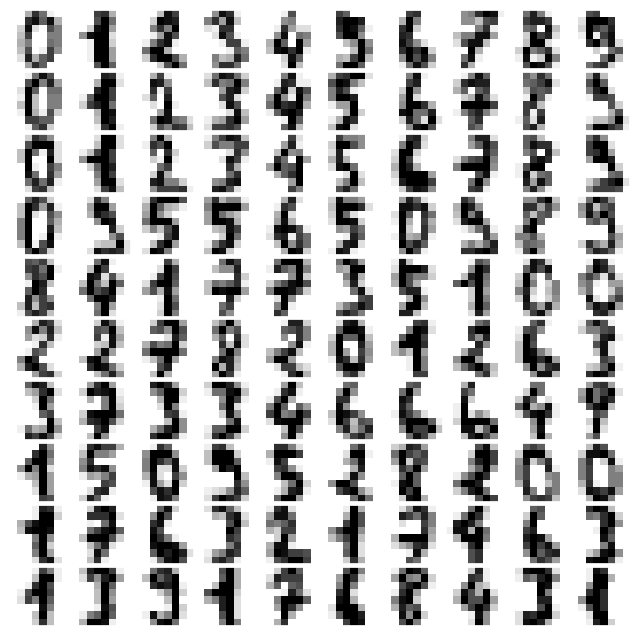

In [77]:
# Next let’s plot the first 100 of these to recall exactly what we’re looking at
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [78]:
# we will start with an invertible dimensionality reduction algorithm on the data. Here we will use 
# a straightforward PCA, asking it to preserve 99% of the variance in the projected data:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

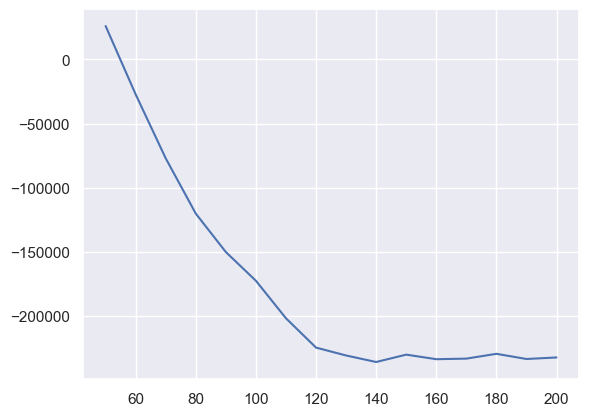

In [79]:
# Given this projected data, let’s use the AIC to get a gauge for the number of GMM components 
# we should use
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [80]:
# Let’s quickly fit this to the data and confirm that it has converged:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [81]:
# Now we can draw samples of 100 new points within this 41-dimensional projected space, using the 
# GMM as a generative model:
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

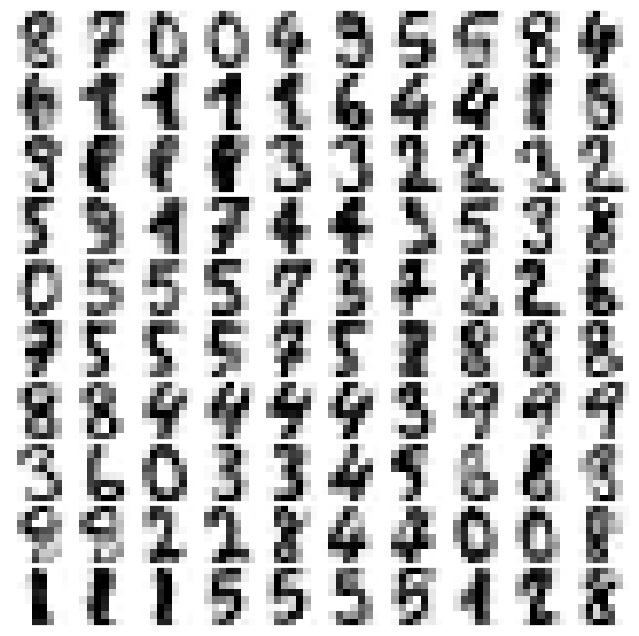

In [82]:
# Finally, we can use the inverse transform of the PCA object to construct the new digits:
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

# Kernel Density Estimation
Kernel density estimation (KDE) is in some senses an
algorithm that takes the mixture-of-Gaussians idea to its logical extreme: it uses a
mixture consisting of one Gaussian component per point, resulting in an essentially
nonparametric estimator of density

In [84]:
# Motivating KDE: Histograms
# For one-dimensional data, you are probably already familiar with one simple density estimator: 
# the histogram. A histogram divides the data into discrete bins, counts the number of points 
# that fall in each bin, and then visualizes the results in an intuitive manner.
import seaborn as sns; sns.set()
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x
x = make_data(1000)

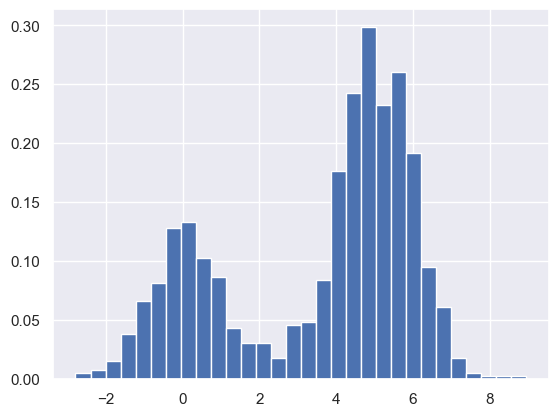

In [85]:
# By specifying the density parameter of the histogram, we end up with a normalized histogram 
# where the height of the bins does not reflect counts, but instead reflects probability density 
hist = plt.hist(x, bins=30, density=True)

In [86]:
# This normalization is chosen so that the total area under the histogram is equal to 1, as we 
# can confirm by looking at the output of the histogram function:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

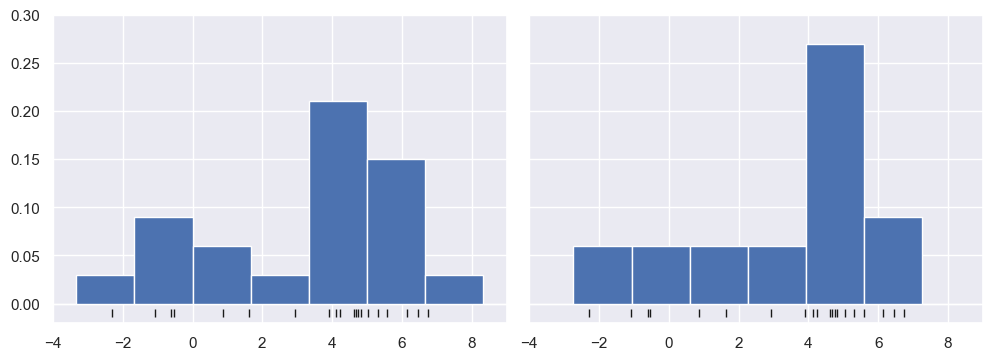

In [87]:
# if we look at a version of this data with only 20 points, the choice of how to draw the bins 
# can lead to an entirely different interpretation of the data:
x = make_data(20)
bins = np.linspace(-5, 10, 10)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True, \
                       subplot_kw={'xlim':(-4, 9), 'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

(-0.2, 8.0)

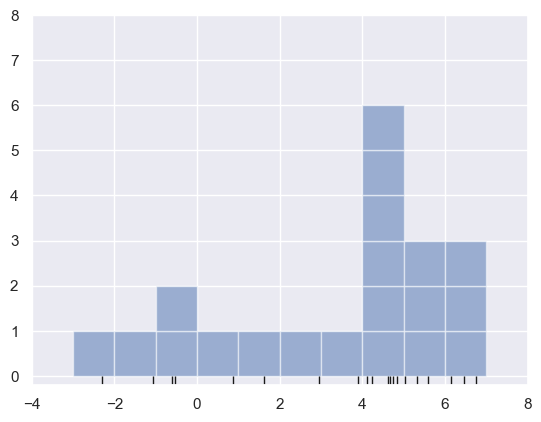

In [88]:
# we can think of a histogram as a stack of blocks, where we stack one
# block within each bin on top of each point in the dataset. Let’s view this directly
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

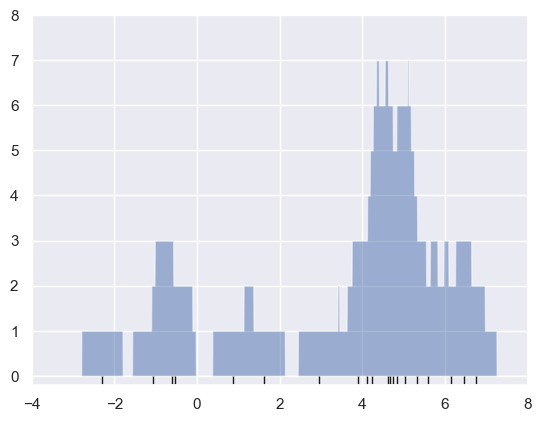

In [89]:
# But what if, instead of stacking the blocks aligned with the bins, we were to stack the blocks 
# aligned with the points they represent? 
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8]);

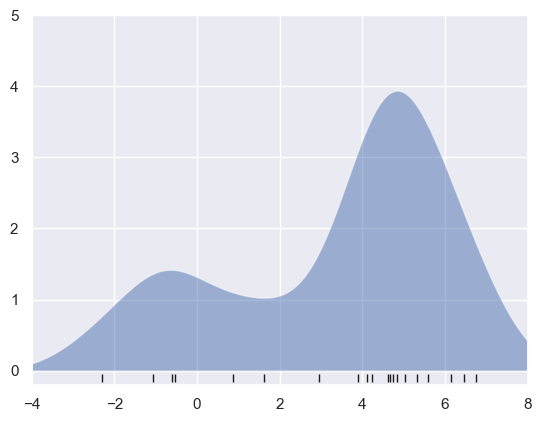

In [90]:
# Still, the rough edges are not aesthetically pleasing, nor are they reflective of any true 
# properties of the data. In order to smooth them out, we might decide to replace the blocks at 
# each location with a smooth function,
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5]);

In [ ]:
# Kernel Density Estimation in Practice
# The free parameters of kernel density estimation are the kernel, which specifies the shape of 
# the distribution placed at each point, and the kernel bandwidth, which controls the size of the 
# kernel at each point. We can determine the kernel bandwidth, which is a free parameter, 
# using Scikit-Learn’s standard crossvalidation tools,

(-0.02, 0.22)

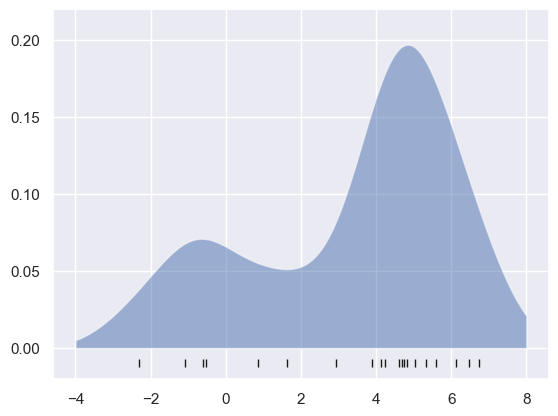

In [91]:
# Let’s first see a simple example of replicating the preceding plot using the Scikit-Learn
# KernelDensity estimator:
from sklearn.neighbors import KernelDensity
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [92]:
# Selecting the bandwidth via cross-validation
# The choice of bandwidth within KDE is extremely important to finding a suitable density estimate,
# and is the knob that controls the bias–variance trade-off in the estimate of density:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths})
grid.fit(x[:, None]);

In [93]:
# Now we can find the choice of bandwidth that maximizes the score (which in this
# case defaults to the log-likelihood):
grid.best_params_

{'bandwidth': 1.291549665014884}

# Practical Example 1: KDE on a Sphere

In [96]:
# make use of some geographic data that can be loaded with ScikitLearn: the geographic 
# distributions of recorded observations of two South American mammals, Bradypus variegatus
# (the brown-throated sloth) and Microryzomys minutus (the forest small rice rat).
from sklearn.datasets import fetch_species_distributions
data = fetch_species_distributions()
# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'],
data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro')for d in data.train['species']], dtype='int')

In [97]:
def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)

In [98]:
# With this data loaded, we can use the Basemap toolkit to plot the observed locations of these
# two species on the map of South America
import os
# os.environ['PROJ_LIB'] = r'C:\Users\USER\Anaconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'
from mpl_toolkits.basemap import Basemap
# from sklearn.datasets.species_distributions import construct_grids

xgrid, ygrid = construct_grids(data)
# plot coastlines with Basemap
m = Basemap(projection='cyl', resolution='c', llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)
# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3, c=species, cmap='rainbow', latlon=True);

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

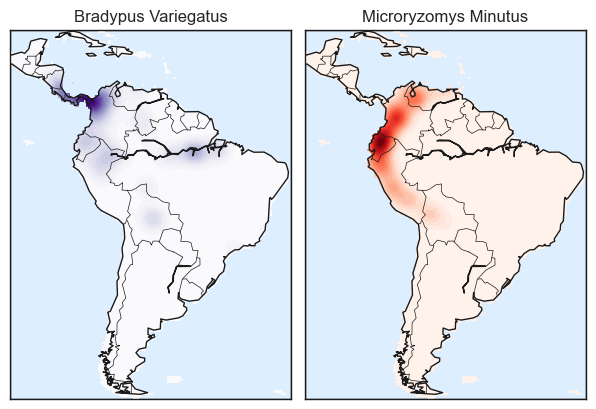

In [42]:
# Let’s use kernel density estimation to show this distribution in a more interpretable way:
# Set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])
# Create two side-by-side plots
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']
for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    # plot coastlines with Basemap
    m = Basemap(projection='cyl', llcrnrlat=Y.min(), urcrnrlat=Y.max(), llcrnrlon=X.min(), \
                urcrnrlon=X.max(), resolution='c', ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    # construct a spherical kernel density estimate of the distribution
    kde = KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species == i]))
    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)
    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])

# Practical Example 2: Not-So-Naive Bayes

In [43]:
# This is the code that implements the algorithm within the Scikit-Learn framework;
# we will step through it following the code block:
from sklearn.base import BaseEstimator, ClassifierMixin
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE Parameters
    ----------
    bandwidth : float //the kernel bandwidth within each class
    kernel : str //the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(Xi) for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
        return self
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X) for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [44]:
# Let’s try this custom estimator on a problem we have seen before: the classification of
# handwritten digits
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
digits = load_digits()
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})
grid.fit(digits.data, digits.target)
scores = grid.cv_results_["mean_test_score"]

{'bandwidth': 6.135907273413174}
accuracy = 0.9677298050139276


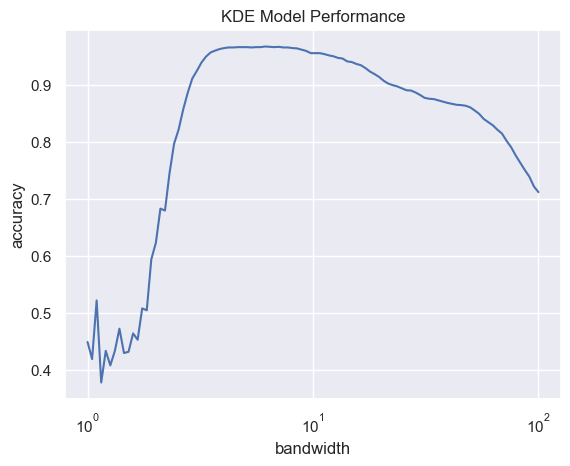

In [45]:
# Next we can plot the cross-validation score as a function of bandwidth
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(grid.best_params_)
print('accuracy =', grid.best_score_)

In [46]:
# We see that this not-so-naive Bayesian classifier reaches a cross-validation accuracy of
# just over 96%; this is compared to around 80% for the naive Bayesian classification:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), digits.data, digits.target).mean()

0.8069281956050759

# Machine Learning Application: A Face Detection Pipeline

In [47]:
# The Histogram of Gradients (HOG) is a straightforward feature extraction procedure that
# was developed in the context of identifying pedestrians within images. 
from skimage import data, color, feature
import skimage.data
image = color.rgb2gray(data.chelsea())
hog_vis = feature.hog(image)
hog_vis
# fig, ax = plt.subplots(1, 2, figsize=(12, 6),
# subplot_kw=dict(xticks=[], yticks=[]))
# ax[0].imshow(image, cmap='gray')
# ax[0].set_title('input image')
# ax[1].imshow(hog_vis)
# ax[1].set_title('visualization of HOG features');

C:\Users\Hp\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


array([0.02976316, 0.        , 0.        , ..., 0.00032657, 0.        ,
       0.        ])

# MODEL DEPLOYMENT

In [1]:
import seaborn as sns
#Load the data
titanic = sns.load_dataset('titanic')

# Drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)
#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])

#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)

#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# we can scale the data, meaning the data will be within a specific range, for example 0–100 or 0–1.
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
 #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

# save the model to any file type e.g json, h5, pkl etc install pickle_blosc using pip to work with .pkl file type
from pickle_blosc import pickle
filename = "titanic_model.pkl"
scale_file = "scale_model.pkl"
titanic_model = pickle(forest, filename)
scale_model = pickle(sc, scale_file)


forest.score(X_train, Y_train)


0.9753954305799648

In [2]:
# Now that we have analyzed the data, created our models, and chosen a model to predict who would’ve survived the Titanic,
# let’s test and see if I would have survived.

from pickle_blosc import unpickle  #unpickle-to lad the model
model = unpickle("Titanic_model.pkl")
sc = unpickle('scale_model.pkl')
my_survival =  [[0.8864824, -1.33761567, -0.09245781,  0.51496671,  0.62486718, -0.38425498,  0.53057164]]
#Print Prediction of Random Forest Classifier model
pred = model.predict(my_survival)
print(pred)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print('Nice! You survived')

[1]
Nice! You survived


In [5]:
import pandas as pd
survival = pd.DataFrame({"pclass":9238000, "sex":532323, "age":34232434, "sibsp":234234, "parch":3424234, "fare":3245365, "embacked":5345231}, index=[0])
survival

pclass     sex       age   sibsp    parch     fare  embacked
0  9238000  532323  34232434  234234  3424234  3245365   5345231